In [3]:
# import the libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import the dataset
loan=pd.read_csv(r"C:\Users\bhargavmeka\Downloads\loan\loan.csv")
loan.head()


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# find the shape of the dataset
loan.shape

(39717, 111)

In [5]:
# finding the information of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# finding the null values in the dataset
loan.isnull().sum()
# finding the percentage of null values in the dataset
round(loan.isnull().sum()/len(loan)*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
# there are lot of null values in the dataset so we need to drop the columns which are having more than 30% of null values
loan=loan.dropna(thresh=0.7*len(loan),axis=1)
loan.shape
loan.isnull().sum()
round(loan.isnull().sum()/len(loan)*100,2)


id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [8]:
# finding the unique values in the dataset
loan.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [9]:
# Having single unique values in the dataset doesn't make any sense so we need to drop the columns which are having unique values = 1
loan=loan.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [10]:
# checking if there are unique values= 1 in the dataset
loan.nunique().sort_values().head(20)
loan.shape

(39717, 44)

In [11]:
# sort value with highest unique values
loan.nunique().sort_values().tail(20)

out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc                  5318
total_rec_prncp             7976
funded_amnt_inv             8205
installment                15383
title                      19615
revol_bal                  21711
emp_title                  28820
last_pymnt_amnt            34930
total_rec_int              35148
total_pymnt_inv            37518
total_pymnt                37850
member_id                  39717
url                        39717
id                         39717
dtype: int64

In [12]:
# Finding values that are not relevant for this analysis
# emp_title, title have text values which are not relevant for this analysis
loan=loan.drop(['emp_title','title'],axis=1)




In [13]:
# There are some columns meant for borrowers who have already taken loan so we need to drop those columns. these columns are out_of_prncp, out_prncp_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
# These columns as per the dictionary shared attribute to the post loan fees and payments. Hence, these columns are not relevant for the analysis
loan=loan.drop(['out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)


In [14]:
# member_id and id variables are the same and hence we can drop member_id and use id as the unique identifier for each loan
# url is not required for the analysis
loan=loan.drop(['member_id','url'],axis=1)

In [15]:
# finding null values in the rest of the columns in percentage
round(loan.isnull().sum()/len(loan)*100,2).sort_values(ascending=False).head(10)

emp_length              2.71
pub_rec_bankruptcies    1.75
revol_util              0.13
zip_code                0.00
total_pymnt_inv         0.00
total_pymnt             0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
dtype: float64

In [16]:
# drop the null valued rows from above columns
loan=loan[~loan['pub_rec_bankruptcies'].isnull()]
loan=loan[~loan['revol_util'].isnull()]
loan=loan[~loan['emp_length'].isnull()]

In [17]:
# checking if the cleanup is done
round(loan.isnull().sum()/len(loan)*100,2).sort_values(ascending=False).head(10)

id                 0.0
loan_amnt          0.0
total_pymnt_inv    0.0
total_pymnt        0.0
total_acc          0.0
revol_util         0.0
revol_bal          0.0
pub_rec            0.0
open_acc           0.0
inq_last_6mths     0.0
dtype: float64

In [18]:
# If the company approves the loan, there are 3 possible scenarios - fully paid, current, charged off
# Current is for applicants who are in the process of paying off their loans. We cannot use this to measure default rate as we don't know whether they will pay the loan or not. Hence, we need to filter current loans
loan=loan[~(loan['loan_status']=='Current')]
#check the values of loan_status
loan['loan_status'].value_counts()

loan_status
Fully Paid     31534
Charged Off     5266
Name: count, dtype: int64

In [19]:
# column term has empty spaces in the beginning so we need to remove them
loan['term']=loan['term'].apply(lambda x: x.strip())
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [20]:
# finding all the datatypes in the dataset
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

In [21]:
# int_rate and revol_util are in object format so we need to convert them into float
loan['int_rate']=loan['int_rate'].apply(lambda x: x.strip('%')).astype('float')
loan['revol_util']=loan['revol_util'].apply(lambda x: x.strip('%')).astype('float')

In [22]:
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

In [23]:
# finding colums with date values and converting them into datetime format
# issue_d, earliest_cr_line are in object format so we need to convert them into datetime format
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan.dtypes
#values of issue_d in first 5 rows
loan['issue_d'].head()


0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [24]:
# Deriving new metrics from the existing columns
# Creating a new column 'loan_issue_year' from 'issue_d' column
loan['loan_issue_year']=loan['issue_d'].dt.year
# Creating a new column 'loan_issue_month' from 'issue_d' column
loan['loan_issue_month']=loan['issue_d'].dt.month
# Creating a new column 'loan_issue_day' from 'issue_d' column
loan['loan_issue_day']=loan['issue_d'].dt.day
# converting the datatype of loan_issue_year to string as we are going to use it for categorical analysis
loan['loan_issue_year']=loan['loan_issue_year'].astype('str')
# converting the datatype of loan_issue_month to string as we are going to use it for categorical analysis
loan['loan_issue_month']=loan['loan_issue_month'].astype('str')
# converting the datatype of loan_issue_day to string as we are going to use it for categorical analysis
loan['loan_issue_day']=loan['loan_issue_day'].astype('str')


# Creating a new column 'earliest_cr_line_year' from 'earliest_cr_line' column
loan['earliest_cr_line_year']=loan['earliest_cr_line'].dt.year.astype('str')
# Creating a new column 'earliest_cr_line_month' from 'earliest_cr_line' column
loan['earliest_cr_line_month']=loan['earliest_cr_line'].dt.month.astype('str')
# Creating a new column 'earliest_cr_line_day' from 'earliest_cr_line' column
loan['earliest_cr_line_day']=loan['earliest_cr_line'].dt.day.astype('str')


In [25]:
# New metric - Approved loan amount ratio is the ratio of the loan amount invested by the investor to the loan amount applied by the borrower
loan['approved_loan_amount_ratio']=round(loan['funded_amnt_inv']/loan['loan_amnt']*100,2)
loan['approved_loan_amount_ratio'].head()
loan['approved_loan_amount_ratio'].describe()

count    36800.000000
mean        94.824049
std         15.016762
min          0.000000
25%         98.410000
50%         99.970000
75%        100.000000
max        100.000000
Name: approved_loan_amount_ratio, dtype: float64

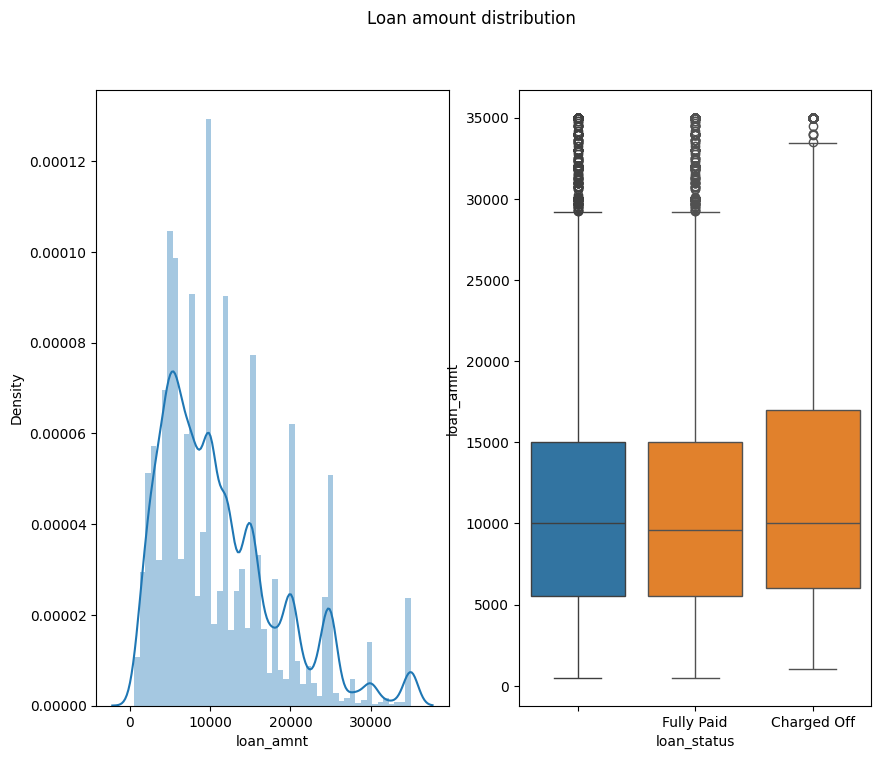

In [26]:
# Univariate analysis with loan_amnt
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of loan_amnt
sns.distplot(loan['loan_amnt'])
plt.subplot(1,2,2)
# plotting the boxplot of loan_amnt
sns.boxplot(y=loan['loan_amnt'])
# plotting the boxplot of loan_amnt with respect to loan_status
sns.boxplot(y=loan['loan_amnt'],x=loan['loan_status'])
# title of the subplot
plt.suptitle('Loan amount distribution')
plt.show()




In [27]:
# descriptive statistics of loan_amnt
loan['loan_amnt'].describe([.25,.5,.75,.90,.95,.99]).round(2)

count    36800.00
mean     11149.54
std       7369.86
min        500.00
25%       5500.00
50%      10000.00
75%      15000.00
90%      22000.00
95%      25000.00
99%      35000.00
max      35000.00
Name: loan_amnt, dtype: float64

Inference from the above analysis
1. The distribution of loan_amnt is right skewed with mean > median
2. The median loan amount is 10000 where most of the loans are distributed
3. Very few loans are distributed for amounts > 20000
4. The median loan amount for charged off loans is higher than fully paid loans

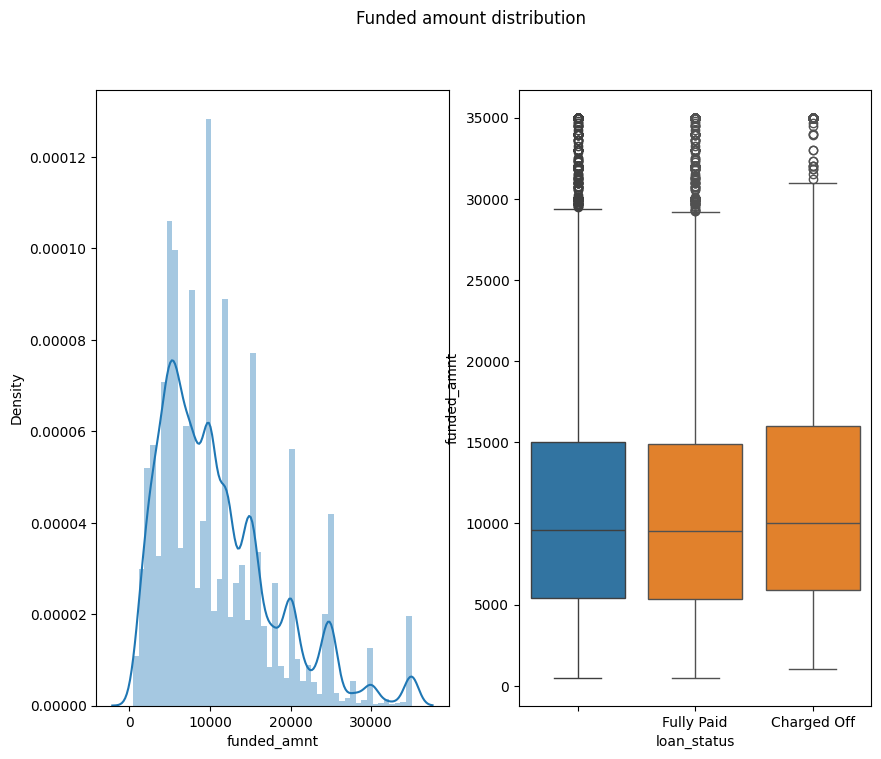

In [28]:
# similar analsyis with funded_amnt
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of funded_amnt
sns.distplot(loan['funded_amnt'])
plt.subplot(1,2,2)
# plotting the boxplot of funded_amnt
sns.boxplot(y=loan['funded_amnt'])
# plotting the boxplot of funded_amnt with respect to loan_status
sns.boxplot(y=loan['funded_amnt'],x=loan['loan_status'])
# title of the subplot
plt.suptitle('Funded amount distribution')
plt.show()

In [29]:
# descriptive statistics of funded_amnt
loan['funded_amnt'].describe([.25,.5,.75,.90,.95,.99]).round(2)

count    36800.00
mean     10880.79
std       7109.16
min        500.00
25%       5400.00
50%       9600.00
75%      15000.00
90%      20375.00
95%      25000.00
99%      35000.00
max      35000.00
Name: funded_amnt, dtype: float64

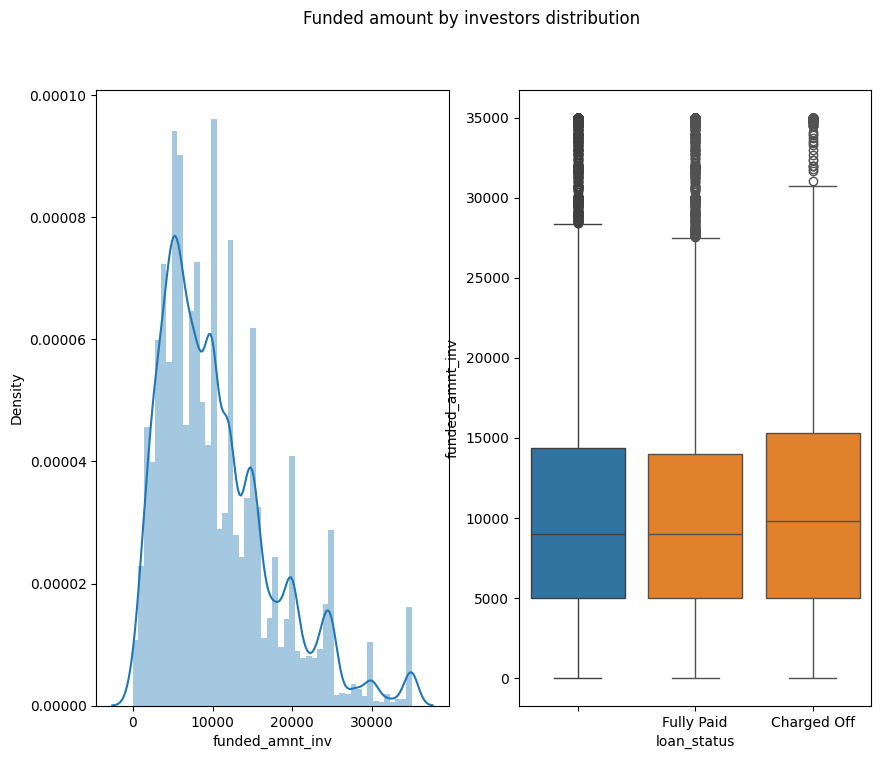

In [30]:
# similar analsyis with funded_amnt_inv
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of funded_amnt_inv
sns.distplot(loan['funded_amnt_inv'])
plt.subplot(1,2,2)
# plotting the boxplot of funded_amnt_inv
sns.boxplot(y=loan['funded_amnt_inv'])
# plotting the boxplot of funded_amnt_inv with respect to loan_status
sns.boxplot(y=loan['funded_amnt_inv'],x=loan['loan_status'])
# title of the subplot
plt.suptitle('Funded amount by investors distribution')
plt.show()

# Inference from the funded_amnt, funded_amnt_inv and loan_amnt
1. Similar distribution of loan_amnt, funded_amnt and funded_amnt_inv
2. Most of the loans applied by borrowers are approved by investors




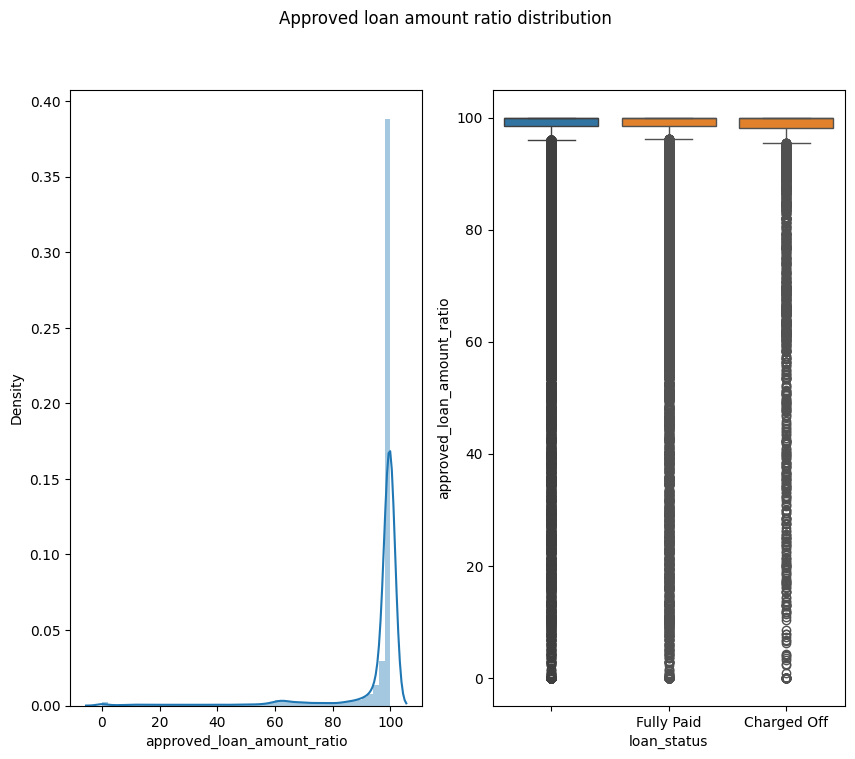

In [31]:
# plots for approved_loan_amount_ratio
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of approved_loan_amount_ratio
sns.distplot(loan['approved_loan_amount_ratio'])
plt.subplot(1,2,2)
# plotting the boxplot of approved_loan_amount_ratio
sns.boxplot(y=loan['approved_loan_amount_ratio'])
# plotting the boxplot of approved_loan_amount_ratio with respect to loan_status
sns.boxplot(y=loan['approved_loan_amount_ratio'],x=loan['loan_status'])
# title of the subplot
plt.suptitle('Approved loan amount ratio distribution')
plt.show()

# Inference from above plot
80% of the loans are approved for 100% of the loan amount applied by the borrower


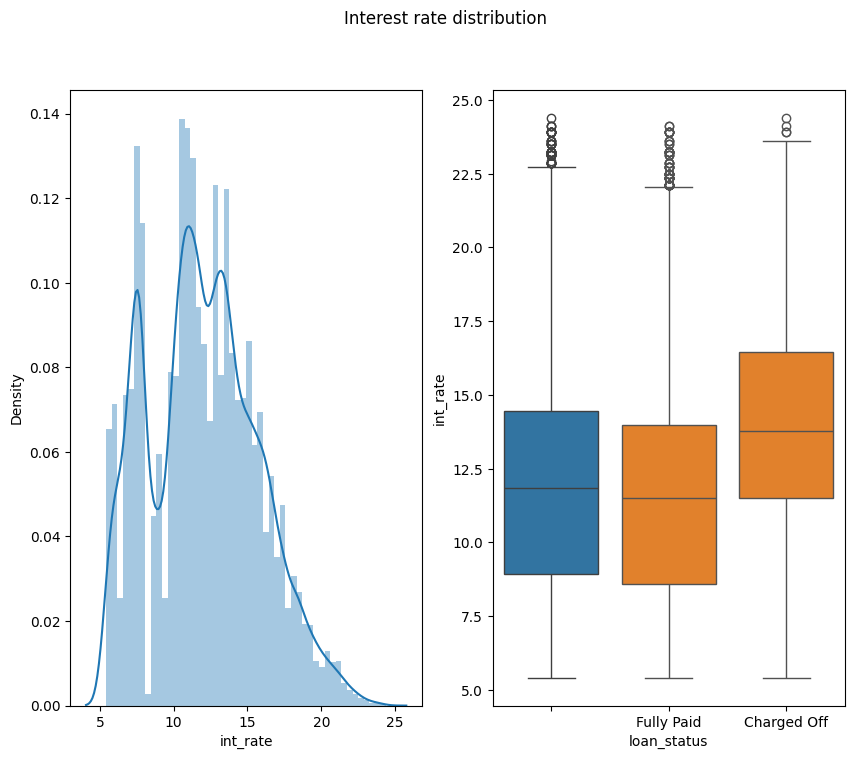

In [32]:
# similar plot for int_rate
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of int_rate
sns.distplot(loan['int_rate'])
plt.subplot(1,2,2)
# plotting the boxplot of int_rate
sns.boxplot(y=loan['int_rate'])
# plotting the boxplot of int_rate with respect to loan_status
sns.boxplot(y=loan['int_rate'],x=loan['loan_status'])
# title of the subplot
plt.suptitle('Interest rate distribution')
plt.show()


# Inference from the above plot
1. The interest rate is between 5.42% to 24.4% with a median of 13.49%
2. The median interest rate for charged off loans is 15.61% and for fully paid loans is 13.11%
3. The interest rate for charged off loans is higher than fully paid loans
4. Most of the loans have an interest rate between 10% to 15%

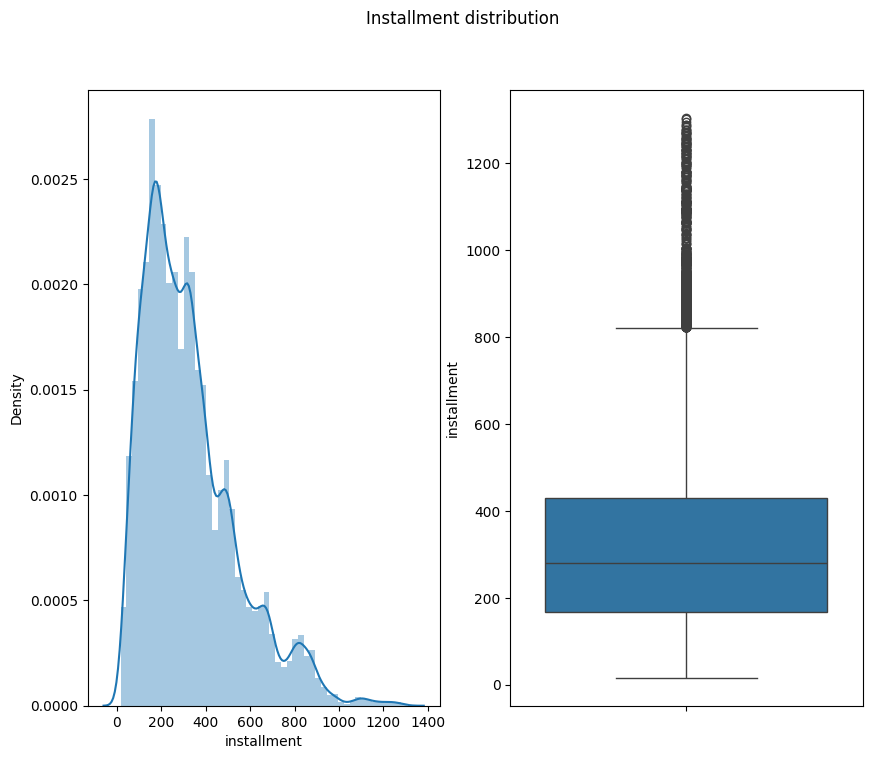

In [33]:
# Similar plot for installment
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of installment
sns.distplot(loan['installment'])
plt.subplot(1,2,2)
# plotting the boxplot of installment
sns.boxplot(y=loan['installment'])
# title of the subplot
plt.suptitle('Installment distribution')
plt.show()

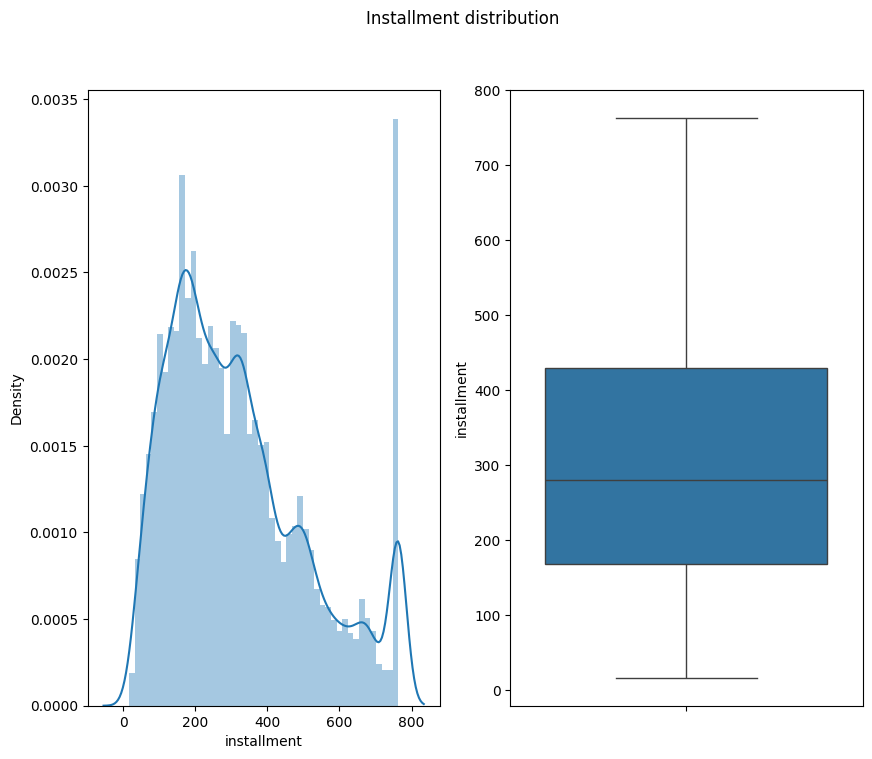

In [34]:
# There are outliers in the installment amount which needs to be treated
# treating the outliers in installment amount
# calculating the 95th percentile of installment
percentile=loan['installment'].quantile(0.95)
# replacing the values greater than 95th percentile with 95th percentile
loan['installment'][loan['installment']>percentile]=percentile
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of installment
sns.distplot(loan['installment'])
plt.subplot(1,2,2)
# plotting the boxplot of installment
sns.boxplot(y=loan['installment'])
# title of the subplot
plt.suptitle('Installment distribution')
plt.show()

# Inference from the above plot
1. Average installment amount is around 300


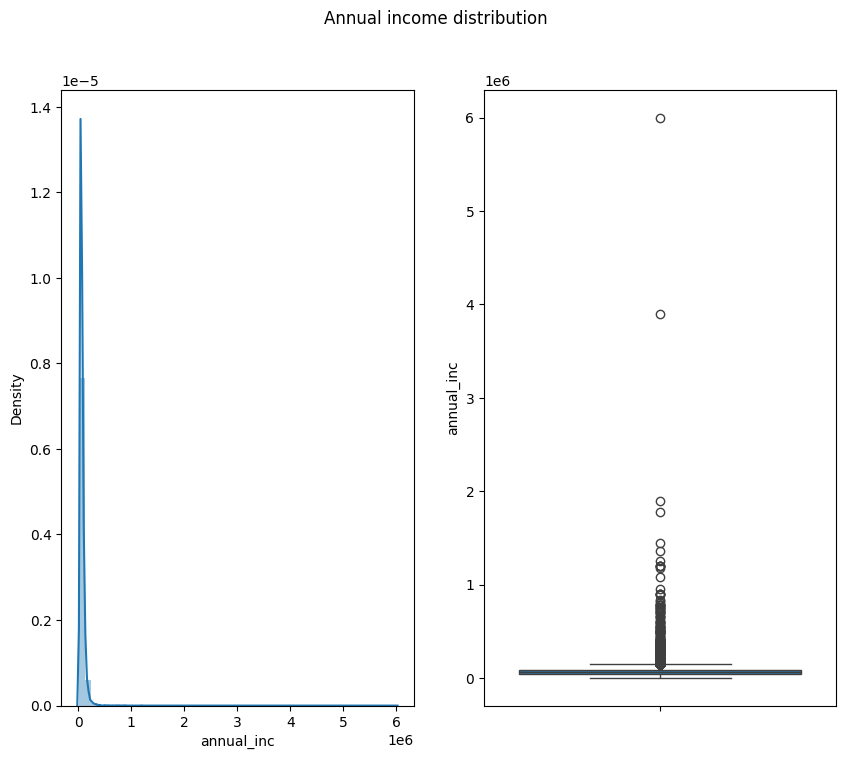

In [35]:
# similar plot for annual_inc
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of annual_inc with actual values of annual_inc
var1 = loan['annual_inc']
sns.distplot(a=var1, hist=True, rug=False)
plt.subplot(1,2,2)
# plotting the boxplot of annual_inc
sns.boxplot(y=loan['annual_inc'])
# title of the subplot
plt.suptitle('Annual income distribution')
plt.show()

# Inference from the above plot
1. Most common annual income is between 0 to 100000
2. Around 90% of the annual income is between 0 to 200000


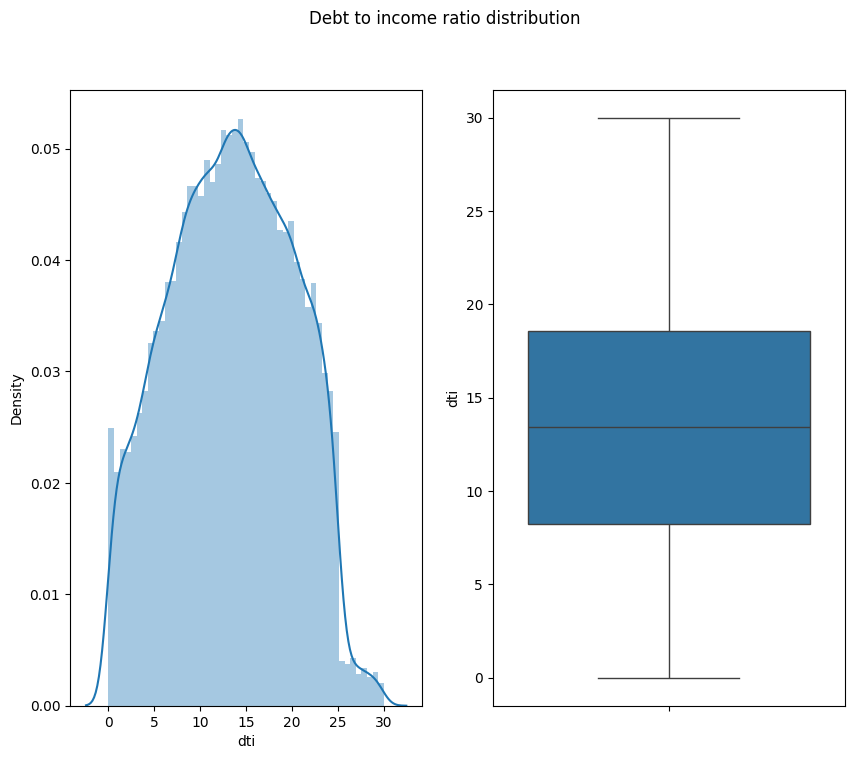

In [36]:
#  plot for dti
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# plotting the distribution of dti
sns.distplot(loan['dti'])
plt.subplot(1,2,2)
# plotting the boxplot of dti
sns.boxplot(y=loan['dti'])
# title of the subplot
plt.suptitle('Debt to income ratio distribution')
plt.show()



# Ineference from above plot
Most of the loans are issued to applicants with debt to income ratio less than 20

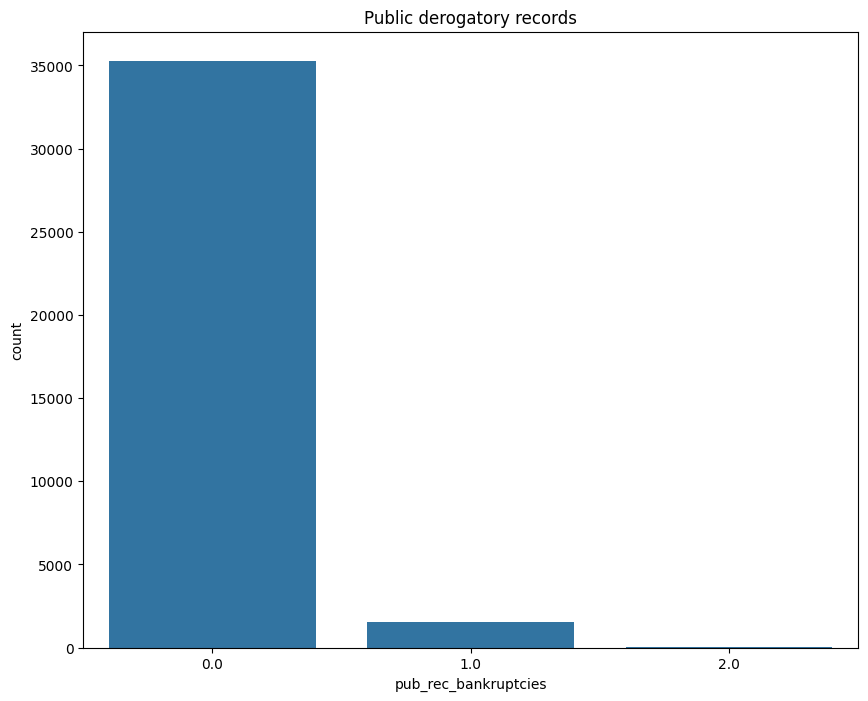

In [37]:
# count the number of applicants with public derogatory records
plt.figure(figsize=(10,8))
sns.countplot(x=loan['pub_rec_bankruptcies'])
# title of the plot
plt.title('Public derogatory records')
plt.show()

# Inference from above plot
Most of the applicants have no public derogatory records

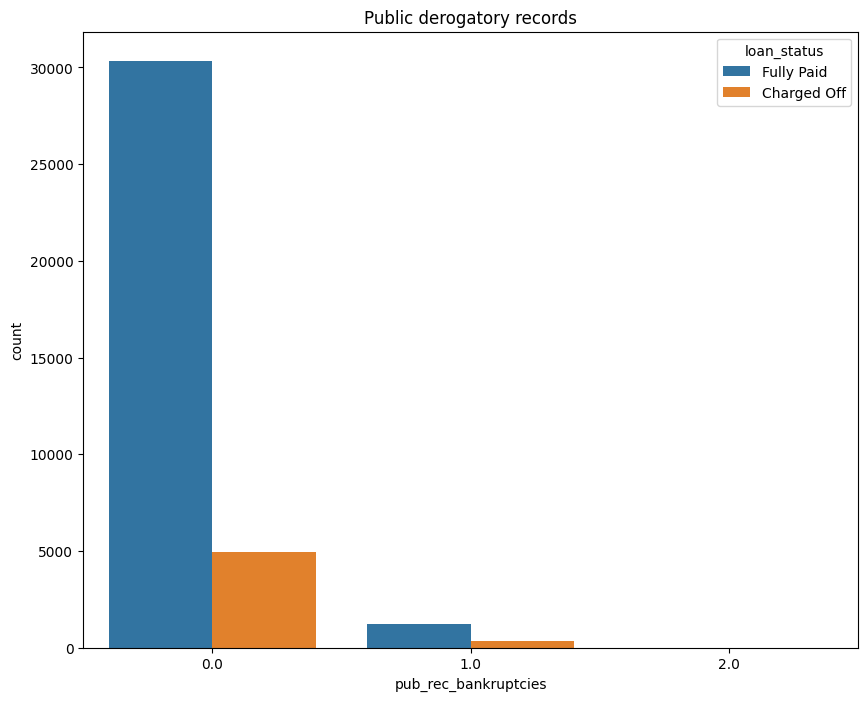

In [38]:
# for pub_rec_bankruptcies
plt.figure(figsize=(10,8))
sns.countplot(x=loan['pub_rec_bankruptcies'],hue=loan['loan_status'])
# title of the plot
plt.title('Public derogatory records')
plt.show()

# Inference from above plot
99% of the applicants have no public derogatory records

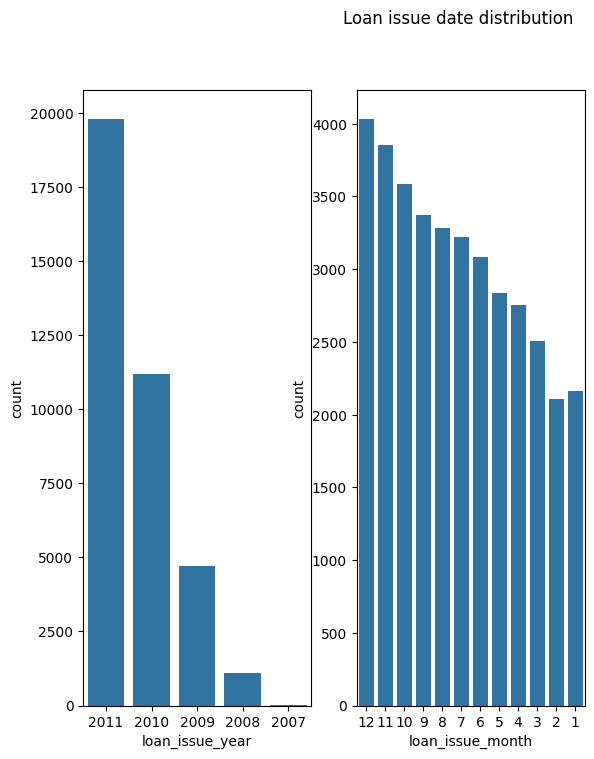

In [39]:
# distribution of loan_issue_year and loan_issue_month and loan_issue_day
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
# plotting the distribution of loan_issue_year
sns.countplot(x=loan['loan_issue_year'])
plt.subplot(1,3,2)
# plotting the distribution of loan_issue_month
sns.countplot(x=loan['loan_issue_month'])
# title of the subplot
plt.suptitle('Loan issue date distribution')
plt.show()

# Inference from the above plot
1. The number of loans issued has been increasing over the years..almost doubled on a yearly basis
2. The number of loans issued is highest in the month of December


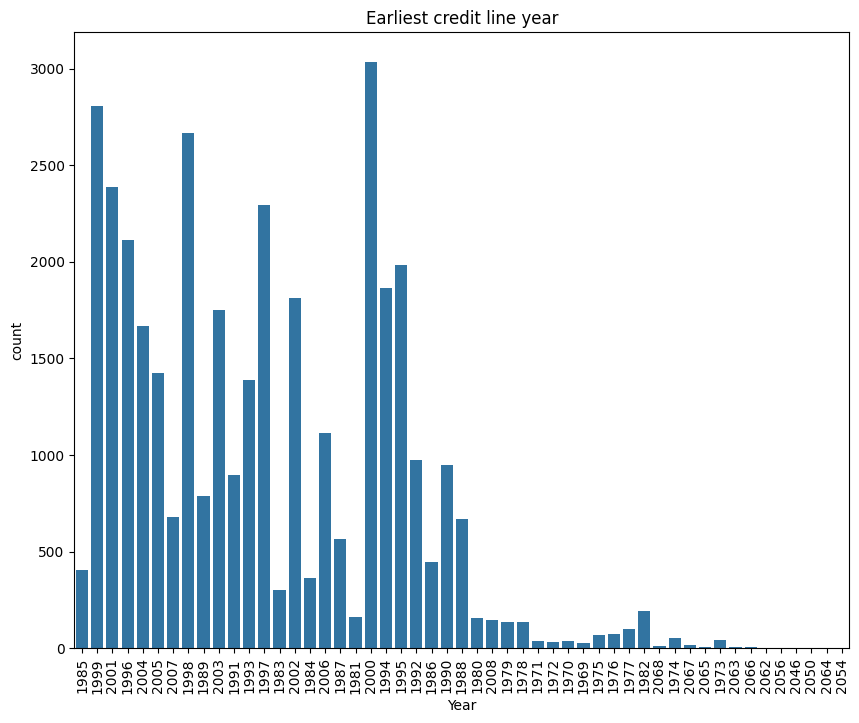

In [40]:
# First line of credit or earliest credit line - earliest_cr_line_year and earliest_cr_line_month
plt.figure(figsize=(10,8))
sns.countplot(x=loan['earliest_cr_line_year'])
plt.title('Earliest credit line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()


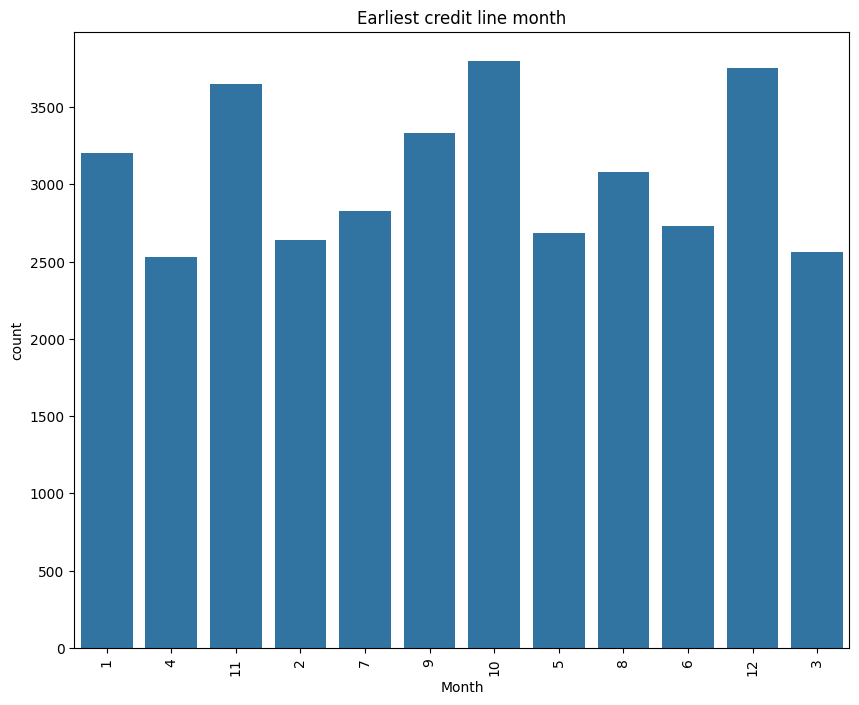

In [41]:
# distribution of earliest_cr_line_month
plt.figure(figsize=(10,8))
sns.countplot(x=loan['earliest_cr_line_month'])
plt.title('Earliest credit line month')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.show()

# Inference from the above 2 plots
1. Most of the applicants have taken their earlier credit line in the year 2000
2. Most of the applicants have taken their earlier credit line in the months of Oct (10), Nov (11) and Dec (12)

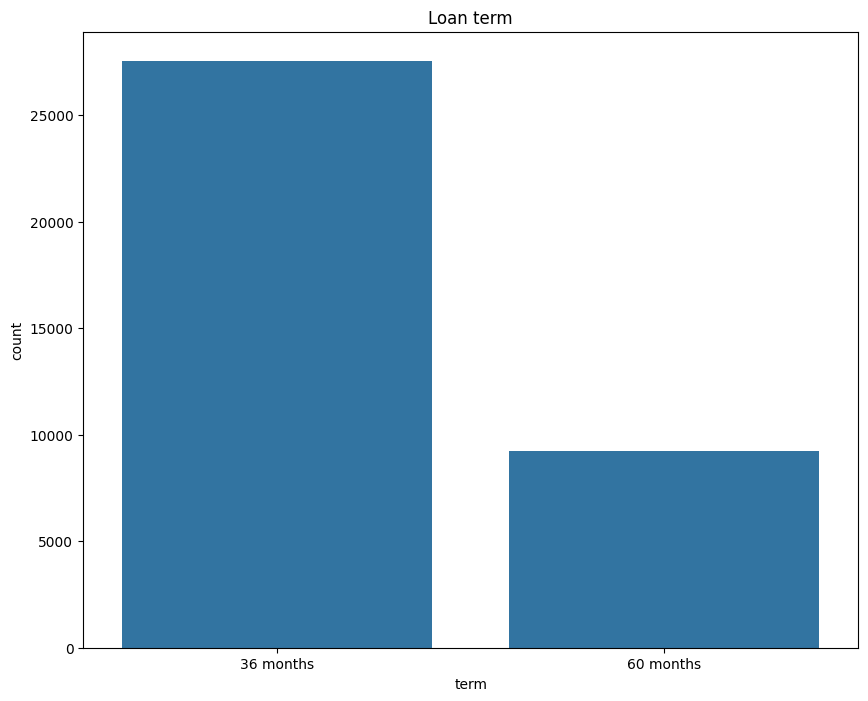

In [42]:
# Analsyis on loan 'term'. 
plt.figure(figsize=(10,8))
sns.countplot(x=loan['term'])
plt.title('Loan term')
plt.show()

Most of the applicants have applied for 36 months loan term

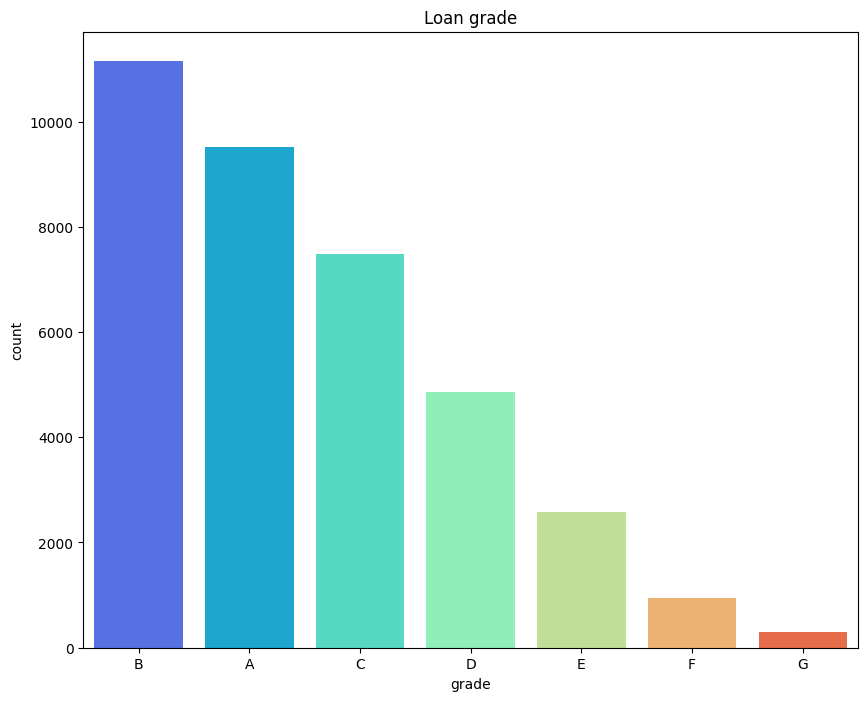

In [43]:
# Analysis on loan 'grade'
plt.figure(figsize=(10,8))
order = loan['grade'].value_counts().index
sns.countplot(x=loan['grade'], order=order, palette='rainbow')
plt.title('Loan grade')
plt.show()

Inference: Most of the loans are of grade A, B and C

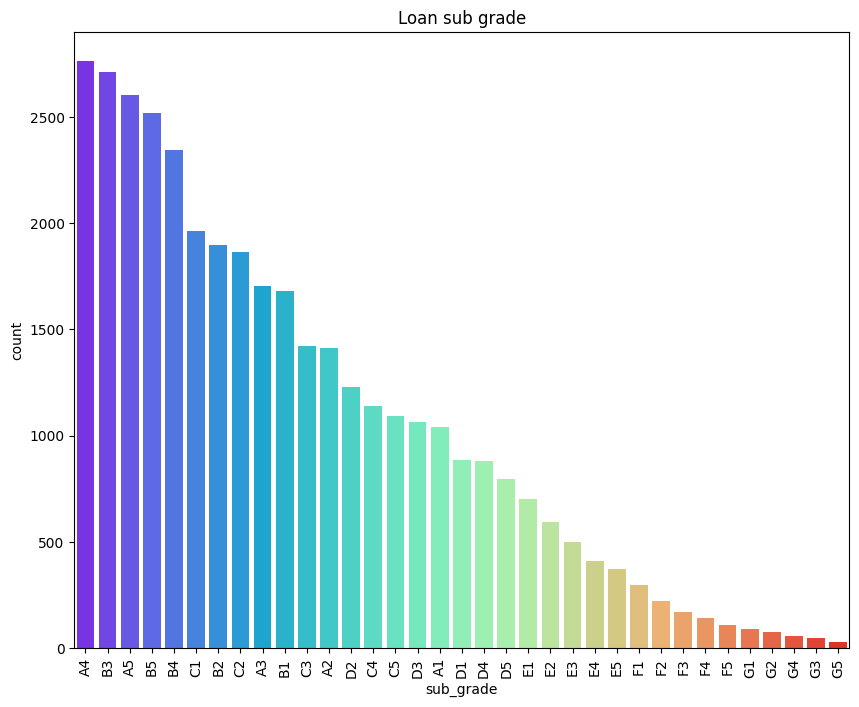

In [44]:
# Analysis on loan 'sub_grade'
plt.figure(figsize=(10,8))
order = loan['sub_grade'].value_counts().index
sns.countplot(x=loan['sub_grade'], order=order, palette='rainbow')
plt.title('Loan sub grade')
plt.xticks(rotation=90)
plt.show()

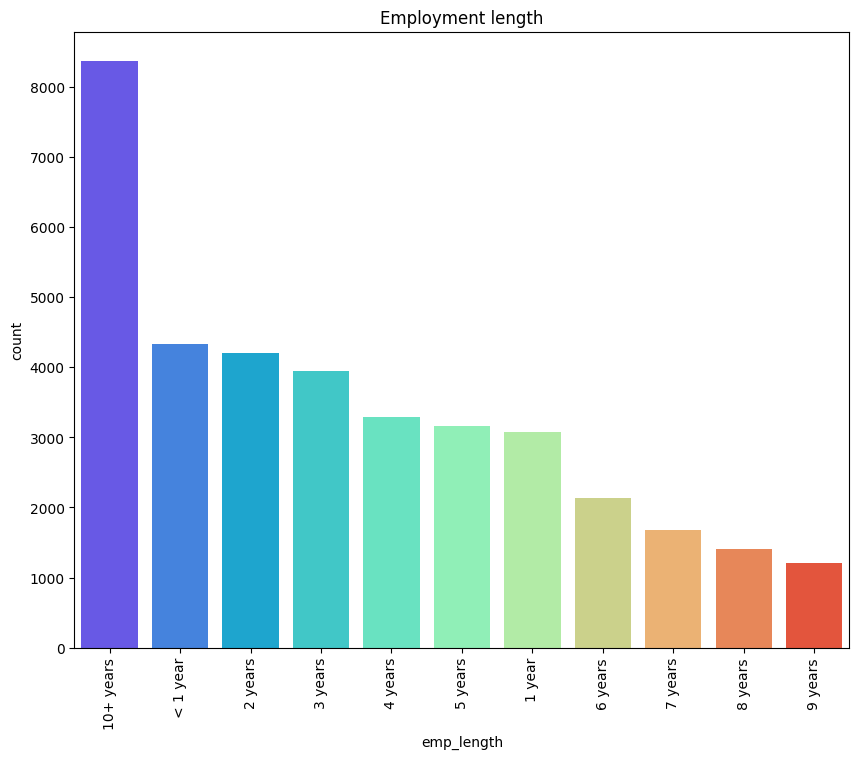

In [45]:
# Analysis on  'emp_length'
plt.figure(figsize=(10,8))
order = loan['emp_length'].value_counts().index
sns.countplot(x=loan['emp_length'], order=order, palette='rainbow')
plt.title('Employment length')
plt.xticks(rotation=90)
plt.show()

# Inference from employment length
Most of the applicants have been employed for 10+ years. This is a good sign for the company as the applicants are employed for a long period of time.

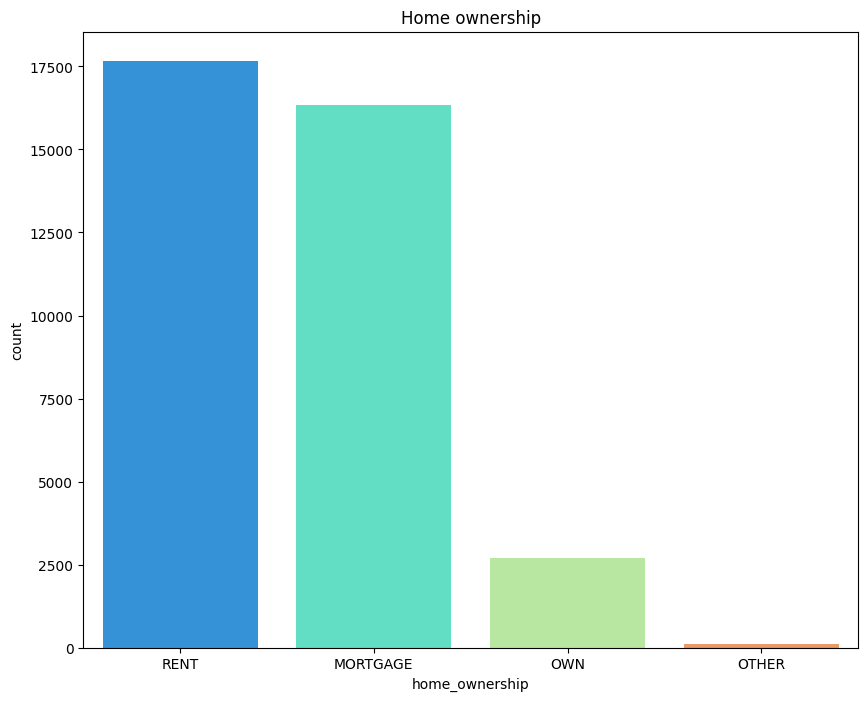

In [46]:
# Analysis on loan 'home_ownership'
plt.figure(figsize=(10,8))
order = loan['home_ownership'].value_counts().index
sns.countplot(x=loan['home_ownership'], order=order, palette='rainbow')
plt.title('Home ownership')
plt.show()

Inference: Majority of the applicants are either on rent or mortgage holders

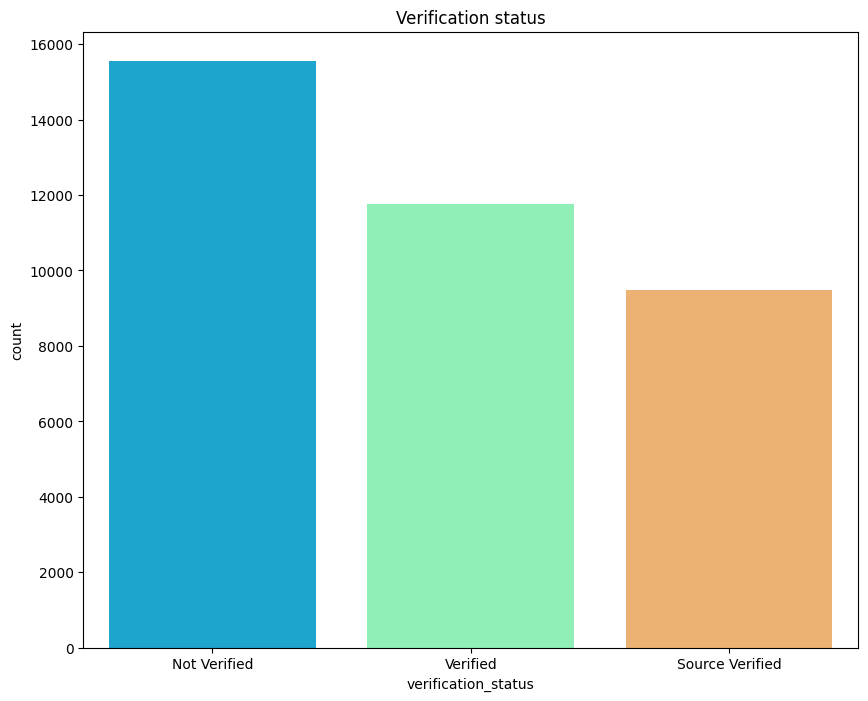

In [47]:
# Analysis on loan 'verification_status'
plt.figure(figsize=(10,8))
order = loan['verification_status'].value_counts().index
sns.countplot(x=loan['verification_status'], order=order, palette='rainbow')
plt.title('Verification status')
plt.show()

Most of the loans are disbursed without verifying the income source of the borrower

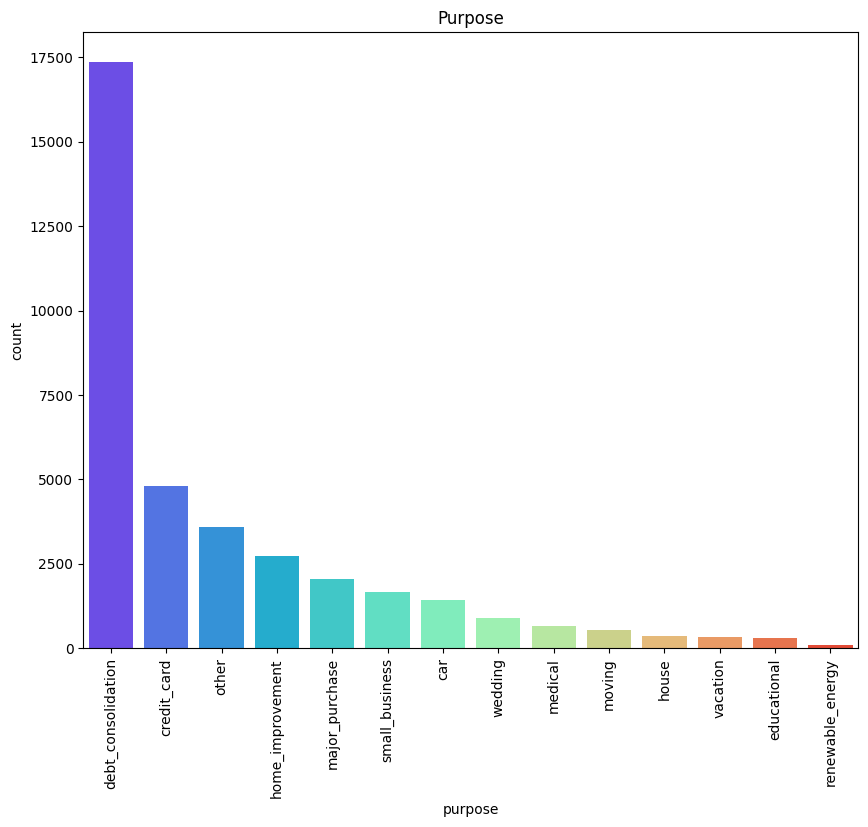

In [48]:
# Analysis on loan 'purpose'
plt.figure(figsize=(10,8))
order = loan['purpose'].value_counts().index
sns.countplot(x=loan['purpose'], order=order, palette='rainbow')
plt.title('Purpose')
plt.xticks(rotation=90)
plt.show()

Most of the borrowers have taken loan for debt consolidation and least number of borrowers have taken loan for educational purposes and renewable energy

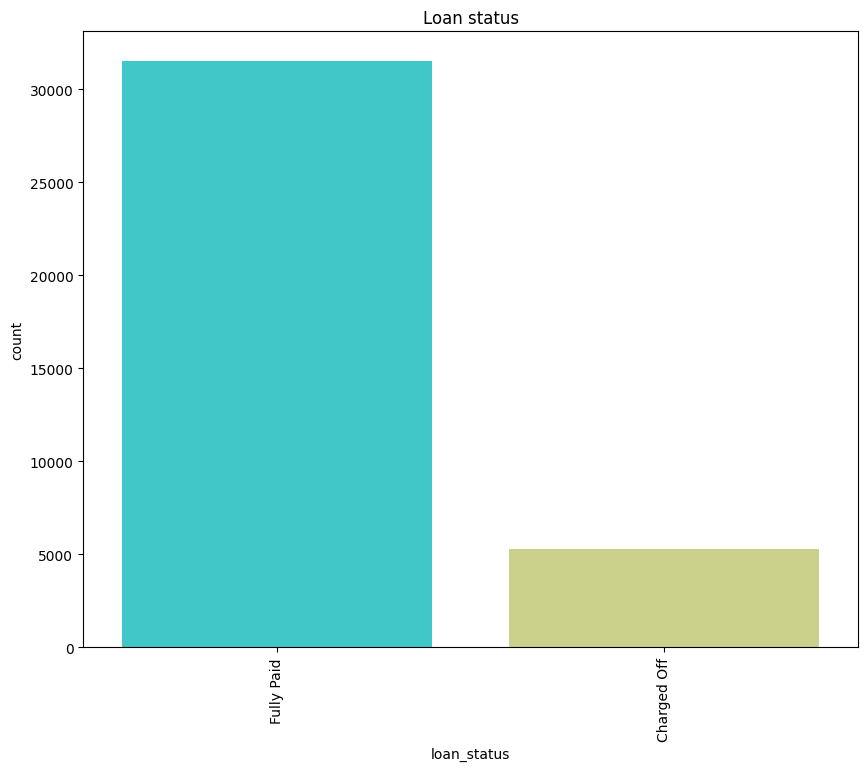

In [49]:
# Analysis on loan status
plt.figure(figsize=(10,8))
order = loan['loan_status'].value_counts().index
sns.countplot(x=loan['loan_status'], order=order, palette='rainbow')
plt.title('Loan status')
plt.xticks(rotation=90)
plt.show()

About 15% of the loans are charged off (defaulted) and 85% are fully paid

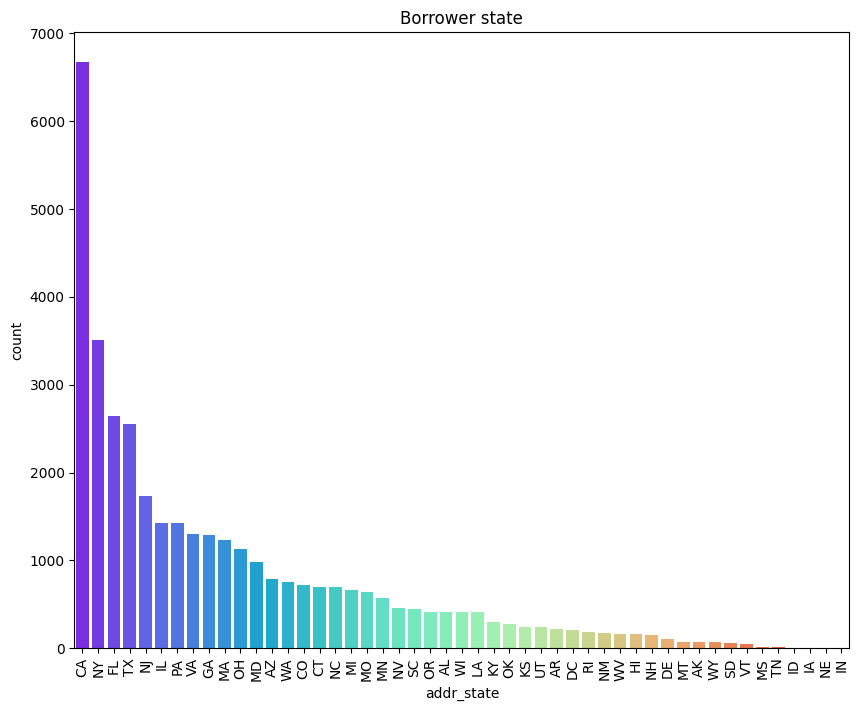

In [50]:
# Analysis based on borrower's address state
plt.figure(figsize=(10,8))
order = loan['addr_state'].value_counts().index
sns.countplot(x=loan['addr_state'], order=order, palette='rainbow')
plt.title('Borrower state')
plt.xticks(rotation=90)
plt.show()

Top 3 borrowers are from CA, NY and FL states

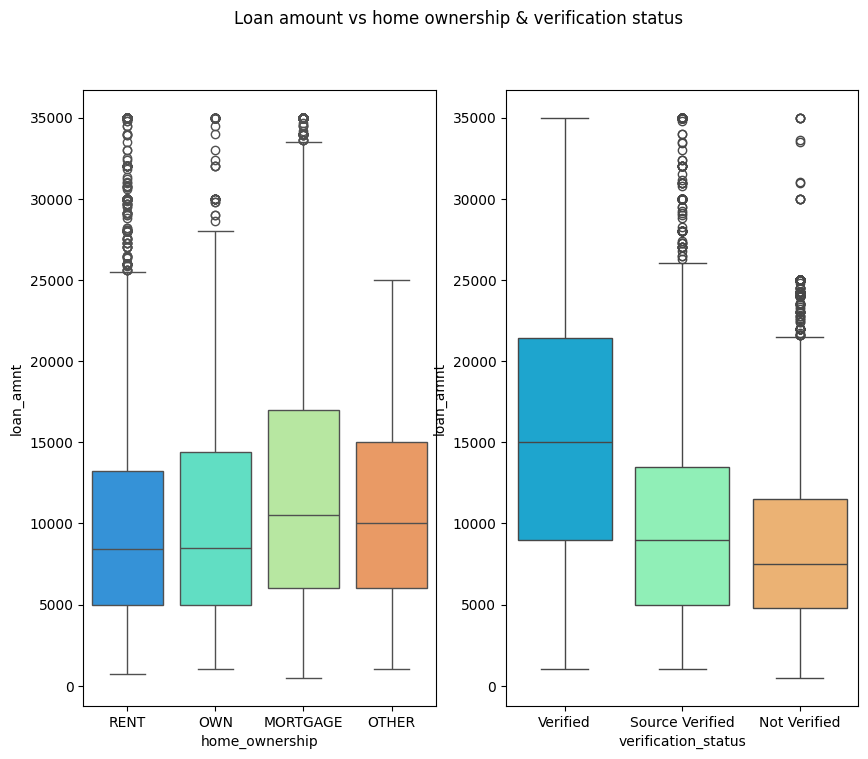

In [51]:
# Segemented univariate analysis
# Loan amount vs home ownership & loan amount vs verification status
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['loan_amnt'],x=loan['home_ownership'], palette='rainbow')
plt.subplot(1,2,2)
sns.boxplot(y=loan['loan_amnt'],x=loan['verification_status'], palette='rainbow')
plt.suptitle('Loan amount vs home ownership & verification status')
plt.show()

# Inference from the above plot
1. Mortgage has the highest loan amount
2. Verified borrowers have the highest loan amount
3. Not verified borrowers have the lowest loan amount


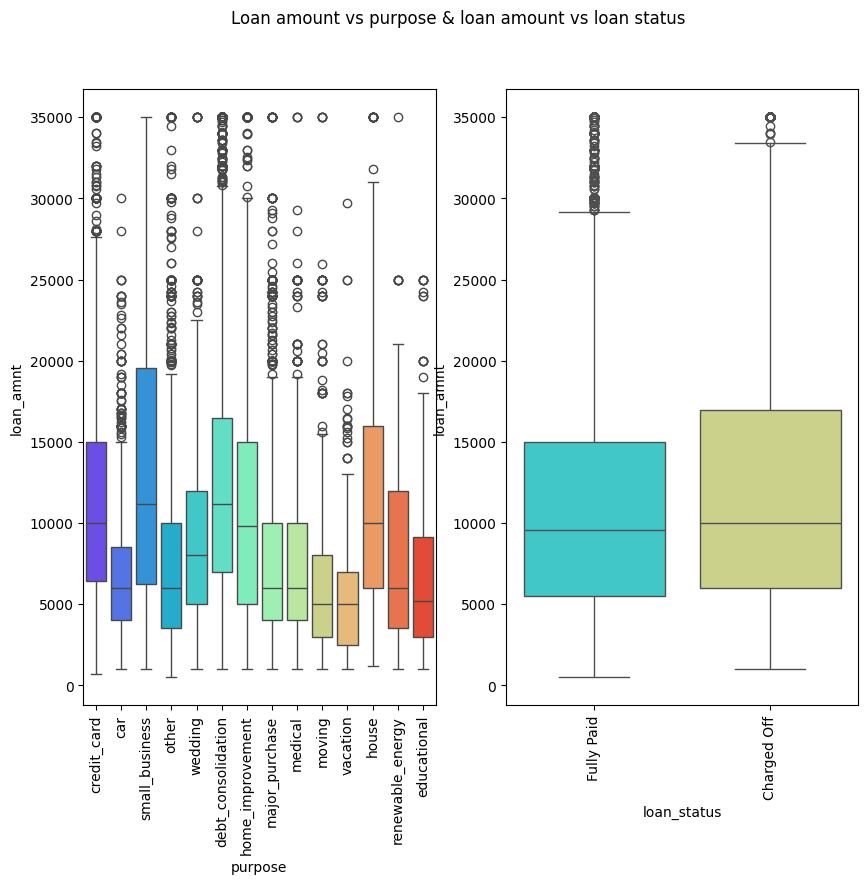

In [52]:
# Loan amount vs purpose & loan amount vs loan status
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['loan_amnt'],x=loan['purpose'], palette='rainbow')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(y=loan['loan_amnt'],x=loan['loan_status'], palette='rainbow')
plt.xticks(rotation=90)
plt.suptitle('Loan amount vs purpose & loan amount vs loan status')
plt.show()


# Inference from the above plot
1. Charged off loans have higher loan amount than fully paid loans
2. Loans for small business have higher loan amount than other purposes

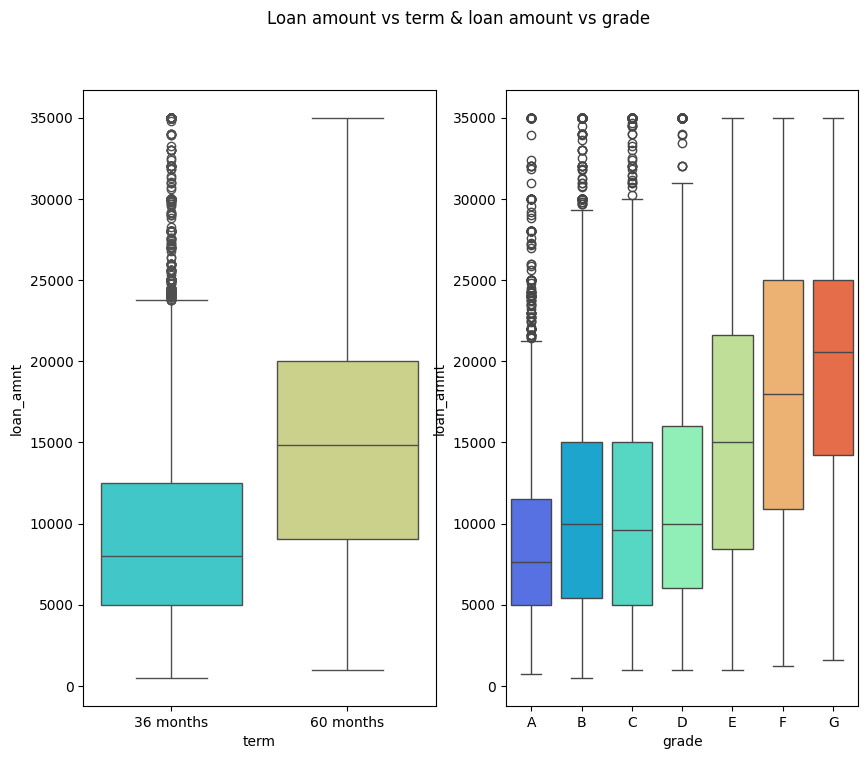

In [53]:
# loan amount vs term & loan amount vs grade
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['loan_amnt'],x=loan['term'], palette='rainbow')
plt.subplot(1,2,2)
# sort the grades in ascending order
sns.boxplot(y=loan['loan_amnt'],x=loan['grade'], palette='rainbow',order=['A','B','C','D','E','F','G'])
plt.suptitle('Loan amount vs term & loan amount vs grade')
plt.show()

# Inference from the above plot
1. Higher loan amounts have higher loan term
2. Higher loan amounts are in grades E, F and G

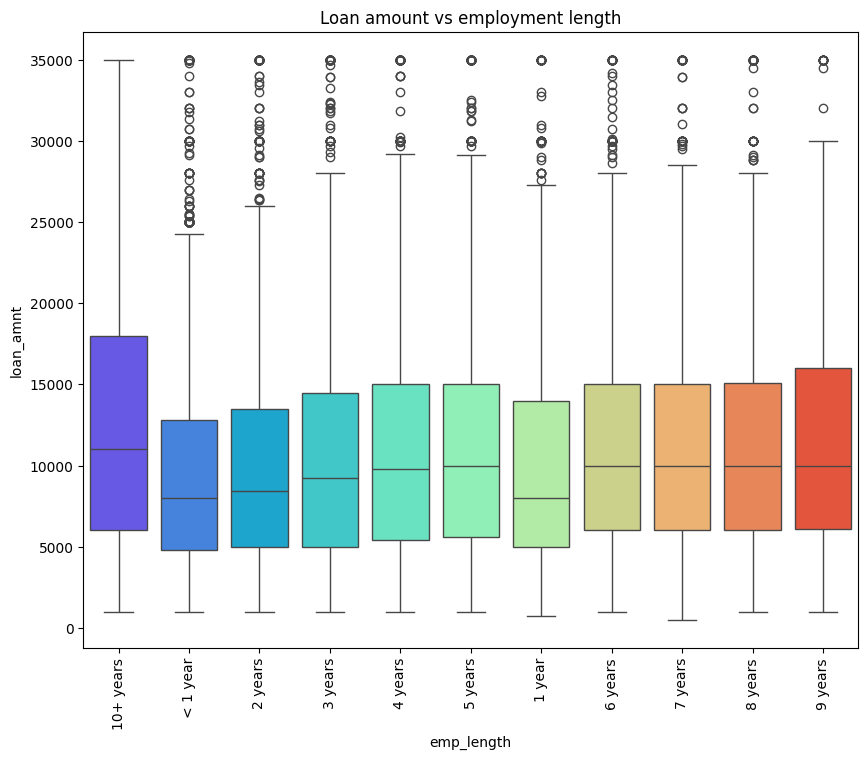

In [54]:
# loan amount vs emp_length
plt.figure(figsize=(10,8))
order = loan['emp_length'].value_counts().index
sns.boxplot(y=loan['loan_amnt'],x=loan['emp_length'], palette='rainbow',order=order)
plt.xticks(rotation=90)
plt.title('Loan amount vs employment length')
plt.show()

# Inference from the above plot
1. Highest loan amount is taken by the borrowers who are employed for 10+ years
2. Lowest loan amount is taken by the borrowers who are employed for 1 year

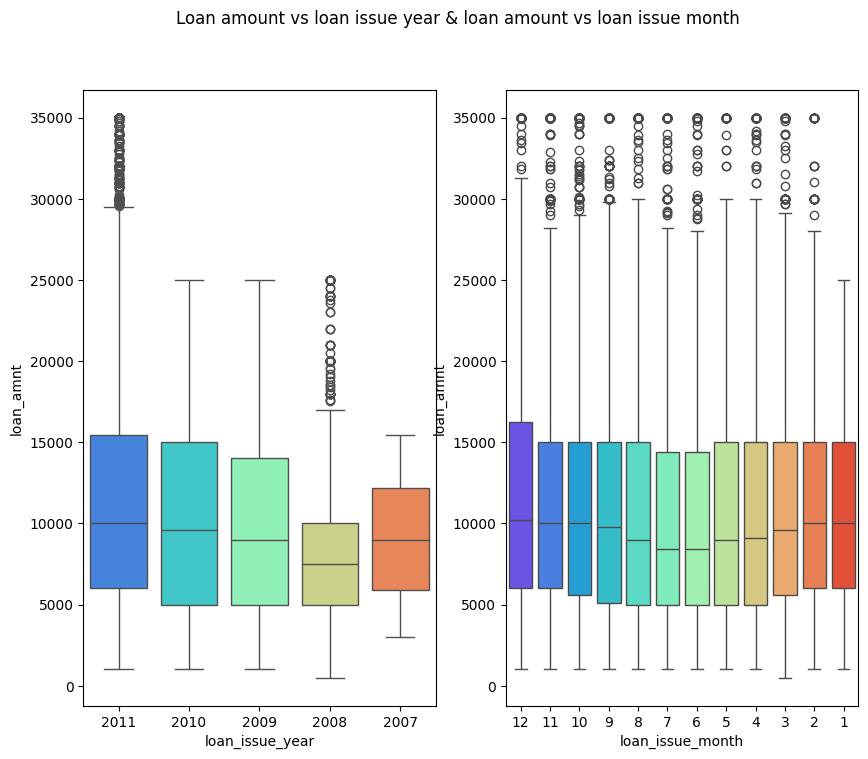

In [55]:
# loan amount vs loan_issue_year & loan amount vs loan_issue_month
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['loan_amnt'],x=loan['loan_issue_year'], palette='rainbow')
plt.subplot(1,2,2)
sns.boxplot(y=loan['loan_amnt'],x=loan['loan_issue_month'], palette='rainbow')
plt.suptitle('Loan amount vs loan issue year & loan amount vs loan issue month')
plt.show()

# Inference from the above plot
1. Loan amount increased over the years from 2007 to 2011
2. Loan amount provided is more in the month of December


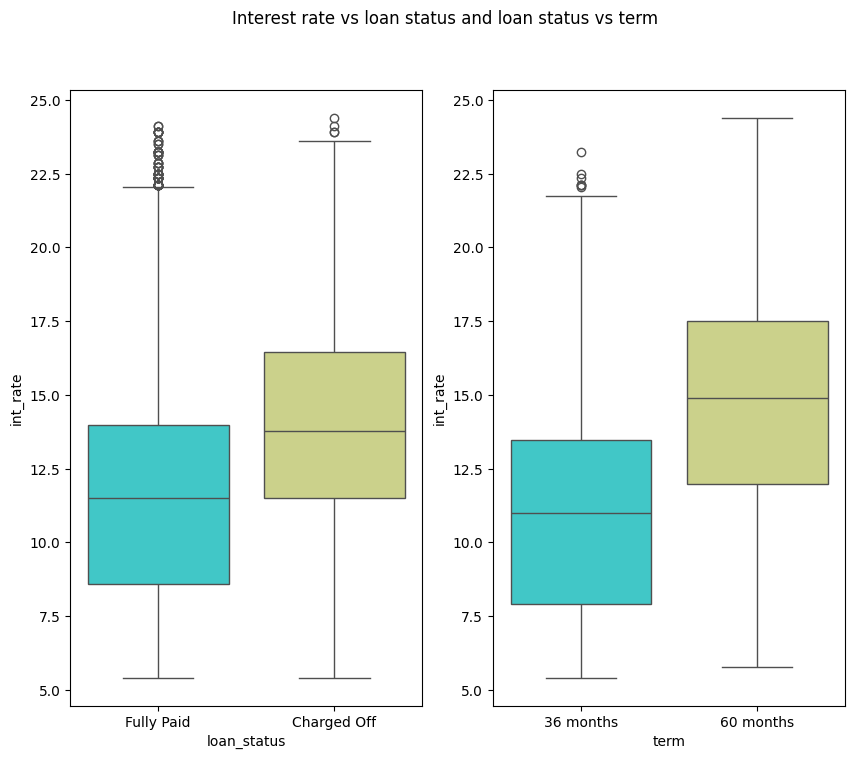

In [56]:
# Interest rate vs loan status and loan status vs term
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['int_rate'],x=loan['loan_status'], palette='rainbow')
plt.subplot(1,2,2)
# interest rate vs term
sns.boxplot(y=loan['int_rate'],x=loan['term'], palette='rainbow')
plt.suptitle('Interest rate vs loan status and loan status vs term')
plt.show()


# Inference from above plot
1. Interest rate is higher for charged off loans
2. Interest rate is higher for 60 months term loans


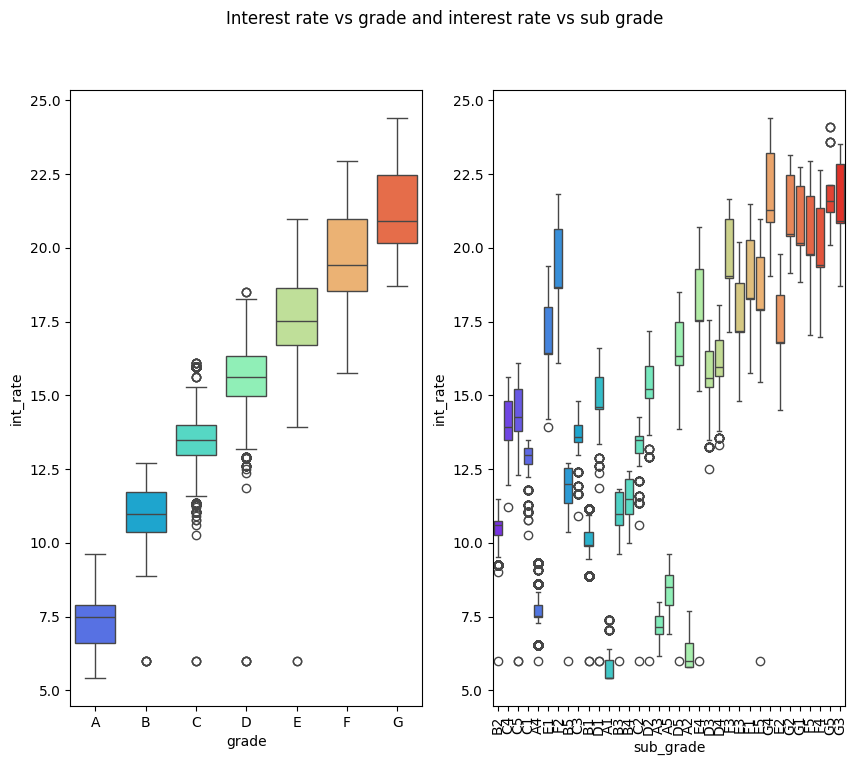

In [57]:
# Interest rate vs grade and interest rate vs sub grade
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# interest rate vs grade
sns.boxplot(y=loan['int_rate'],x=loan['grade'], palette='rainbow',order=['A','B','C','D','E','F','G'])
plt.subplot(1,2,2)
# interest rate vs sub grade
sns.boxplot(y=loan['int_rate'],x=loan['sub_grade'], palette='rainbow')
plt.xticks(rotation=90)
plt.suptitle('Interest rate vs grade and interest rate vs sub grade')
plt.show()

Interest rates are higher as the grade and sub grade decreases

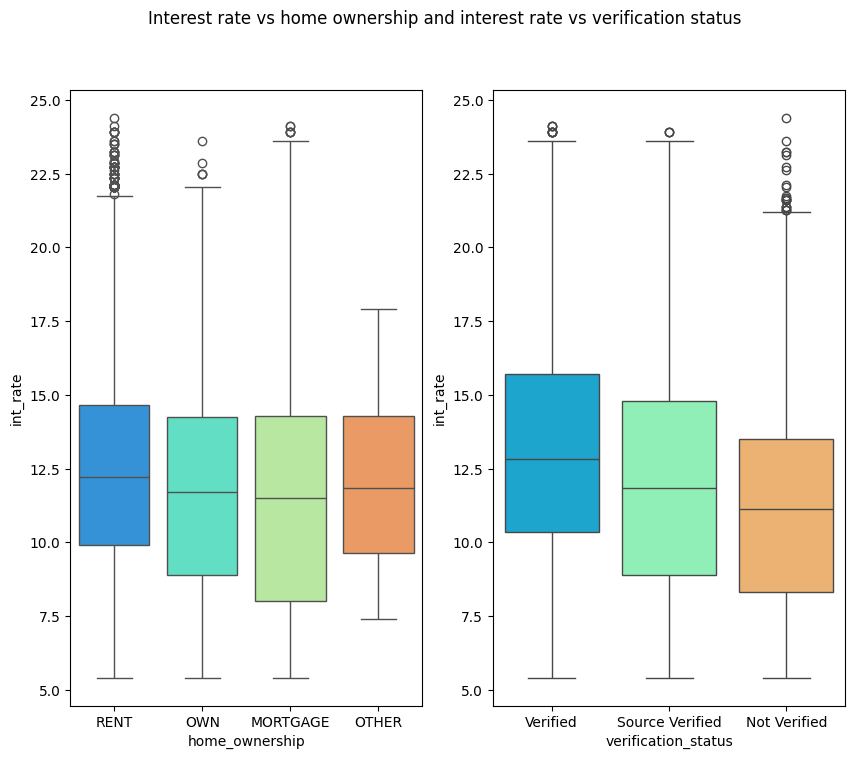

In [58]:
# Interest rate vs home ownership and interest rate vs verification status
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# interest rate vs home ownership
sns.boxplot(y=loan['int_rate'],x=loan['home_ownership'], palette='rainbow')
plt.subplot(1,2,2)
# interest rate vs verification status
sns.boxplot(y=loan['int_rate'],x=loan['verification_status'], palette='rainbow')
plt.suptitle('Interest rate vs home ownership and interest rate vs verification status')
plt.show()

1. Borrowers with home ownership as Own and Mortgage have lower interest rates
2. Not verified borrowers have lower interest rates

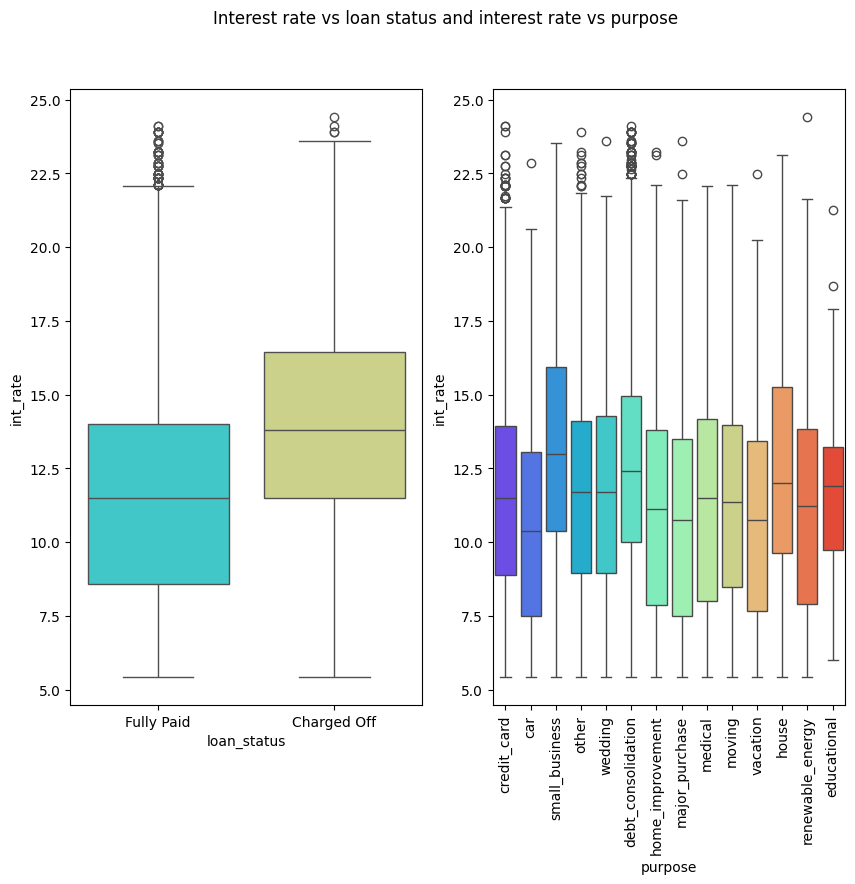

In [59]:
# interest rate vs loan status and interest rate vs purpose
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# interest rate vs loan status
sns.boxplot(y=loan['int_rate'],x=loan['loan_status'], palette='rainbow')
plt.subplot(1,2,2)
# interest rate vs purpose
sns.boxplot(y=loan['int_rate'],x=loan['purpose'], palette='rainbow')
plt.xticks(rotation=90)
plt.suptitle('Interest rate vs loan status and interest rate vs purpose')
plt.show()

1. Higher interest rates could be the reason for loan defaults
2. small business, debt consolidation & house loans have higher interest rates

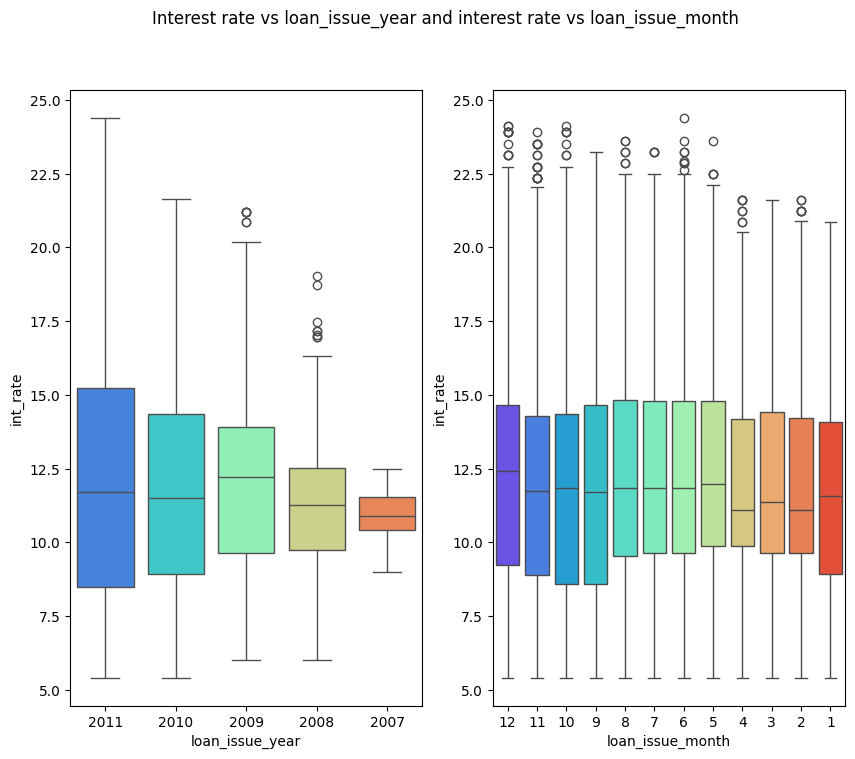

In [60]:
# interest rate vs loan_issue_year and interest rate vs loan_issue_month
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# interest rate vs loan_issue_year
sns.boxplot(y=loan['int_rate'],x=loan['loan_issue_year'], palette='rainbow')
plt.subplot(1,2,2)
# interest rate vs loan_issue_month
sns.boxplot(y=loan['int_rate'],x=loan['loan_issue_month'], palette='rainbow')
plt.suptitle('Interest rate vs loan_issue_year and interest rate vs loan_issue_month')
plt.show()

Interest rates range grew over the years

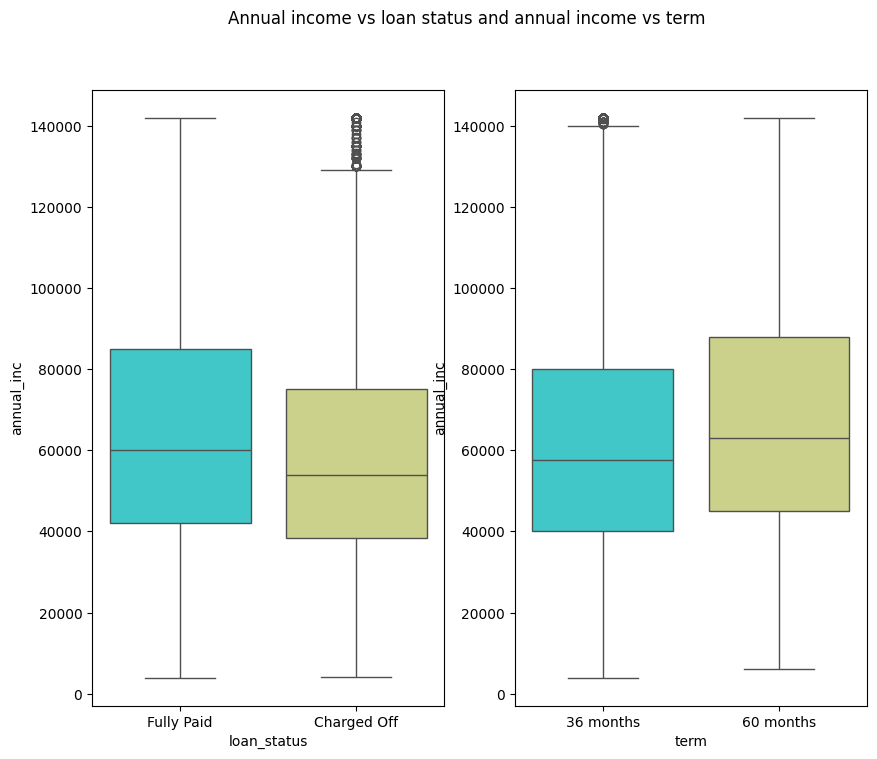

In [61]:
# Annual income vs loan status and annual income vs term
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# annual income vs loan status remove outliers
percentile=loan['annual_inc'].quantile(0.95)
loan['annual_inc'][loan['annual_inc']>percentile]=percentile
sns.boxplot(y=loan['annual_inc'],x=loan['loan_status'], palette='rainbow')
plt.subplot(1,2,2)
# annual income vs term
sns.boxplot(y=loan['annual_inc'],x=loan['term'], palette='rainbow')
plt.suptitle('Annual income vs loan status and annual income vs term')
plt.show()

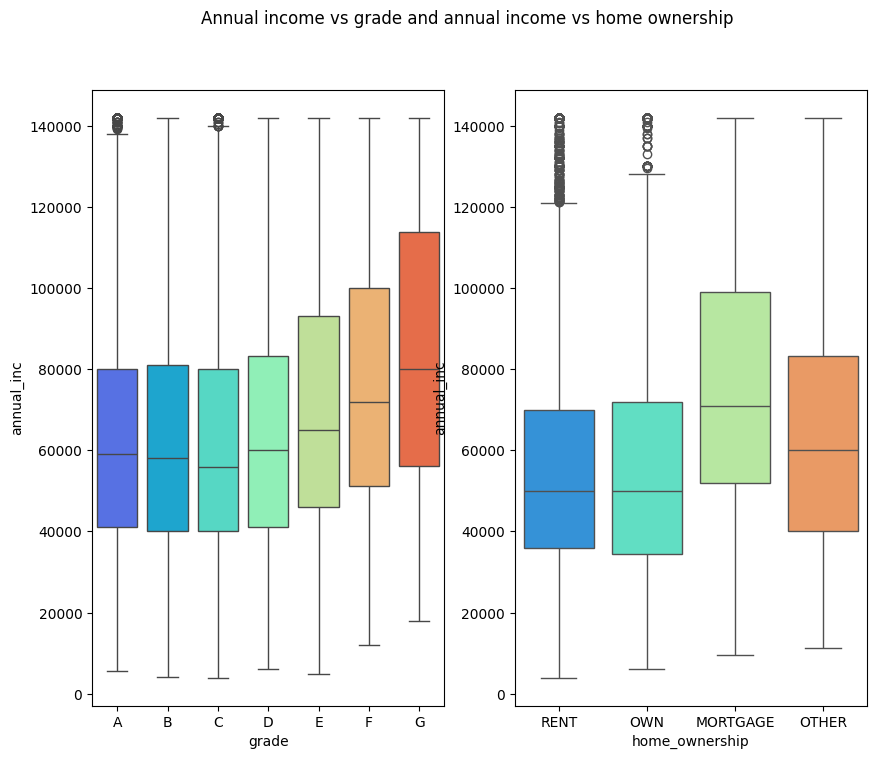

In [62]:
# annual income vs grade and annual income vs home ownership
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# annual income vs grade
sns.boxplot(y=loan['annual_inc'],x=loan['grade'], palette='rainbow',order=['A','B','C','D','E','F','G'])
plt.subplot(1,2,2)
# annual income vs home ownership
sns.boxplot(y=loan['annual_inc'],x=loan['home_ownership'], palette='rainbow')
plt.suptitle('Annual income vs grade and annual income vs home ownership')
plt.show()

1. Annual income for home ownership - MORTGAGE is higher than other home ownership types
2. lower the grades like G,H, annual income is higher

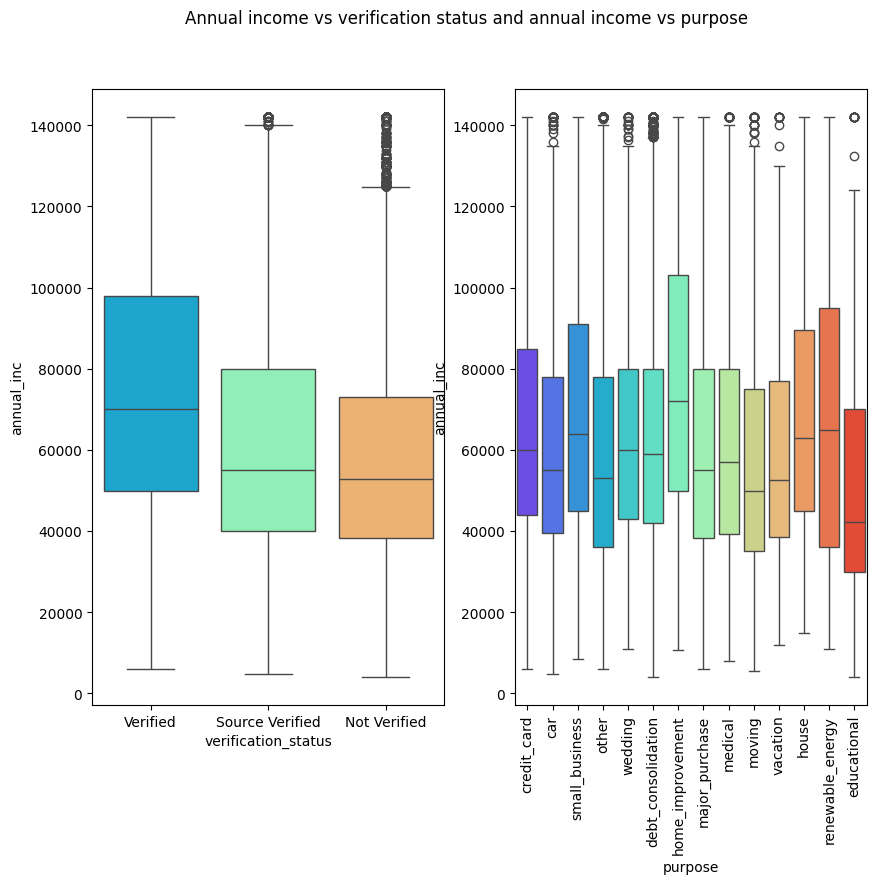

In [63]:
# annual income vs verification status and annual income vs purpose
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# annual income vs verification status
sns.boxplot(y=loan['annual_inc'],x=loan['verification_status'], palette='rainbow')
plt.subplot(1,2,2)
# annual income vs purpose
sns.boxplot(y=loan['annual_inc'],x=loan['purpose'], palette='rainbow')
plt.xticks(rotation=90)
plt.suptitle('Annual income vs verification status and annual income vs purpose')
plt.show()

 1. home improvement, renewable energy and small business have higher annual income
 2. Most of the verified loans have higher annual income

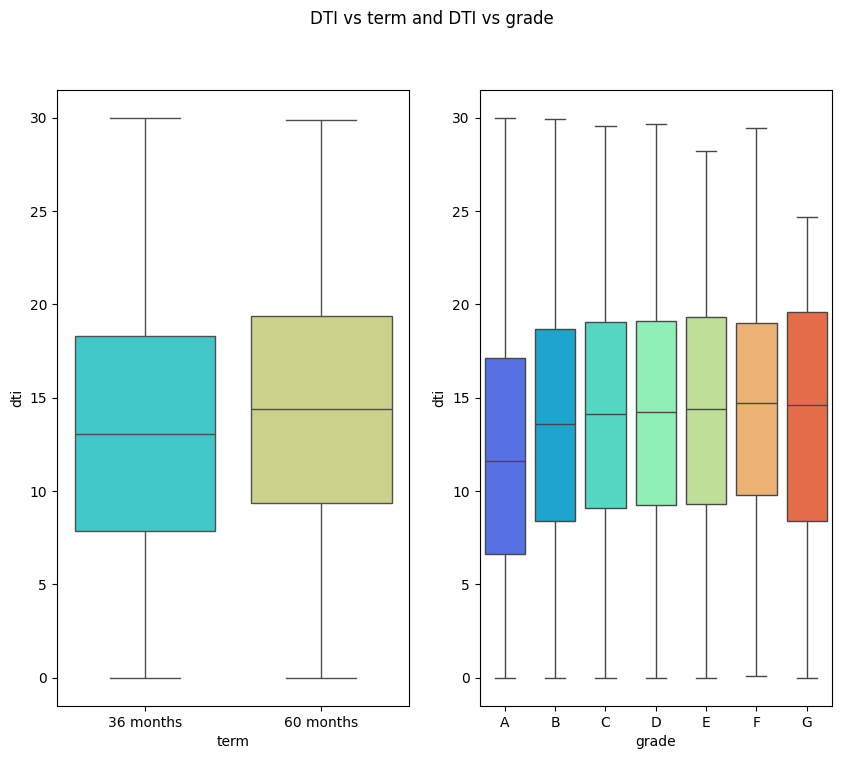

In [64]:
# DTI vs term and DTI vs grade
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# DTI vs term
sns.boxplot(y=loan['dti'],x=loan['term'], palette='rainbow')
plt.subplot(1,2,2)
# DTI vs grade
sns.boxplot(y=loan['dti'],x=loan['grade'], palette='rainbow',order=['A','B','C','D','E','F','G'])
plt.suptitle('DTI vs term and DTI vs grade')
plt.show()

1. DTI is higher for applicants with higher loan amount
2. Lower the DTI, higher the grade of the loan

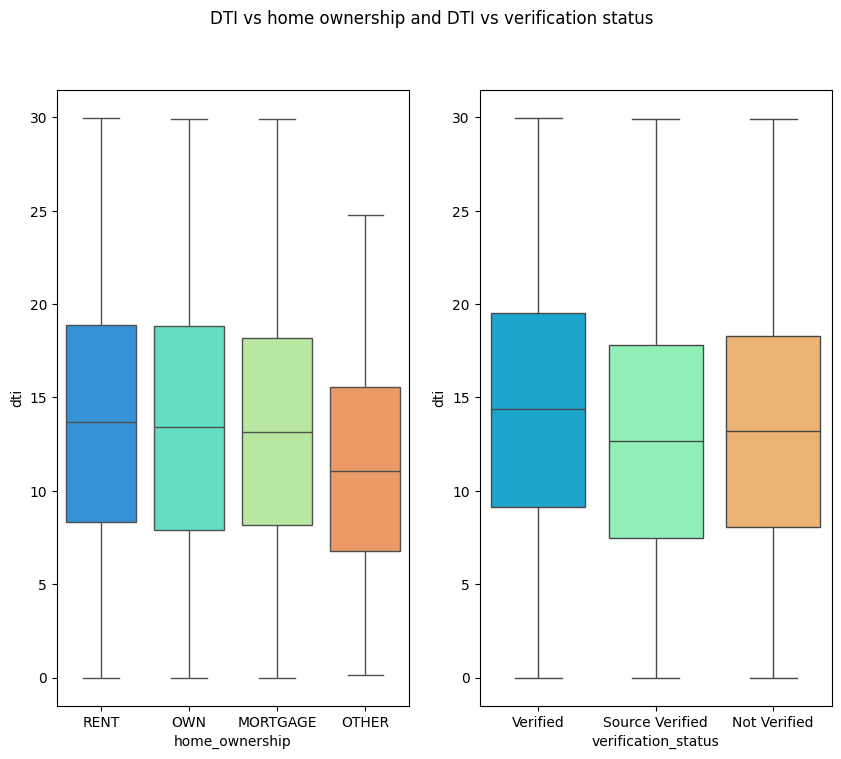

In [65]:
# DTI vs home ownership and DTI vs verification status
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# DTI vs home ownership
sns.boxplot(y=loan['dti'],x=loan['home_ownership'], palette='rainbow')
plt.subplot(1,2,2)
# DTI vs verification status
sns.boxplot(y=loan['dti'],x=loan['verification_status'], palette='rainbow')
plt.suptitle('DTI vs home ownership and DTI vs verification status')
plt.show()

1. Not much change in DTI vs home ownership
2. DTI vs verification status - verified applicants have higher DTI than not verified applicants

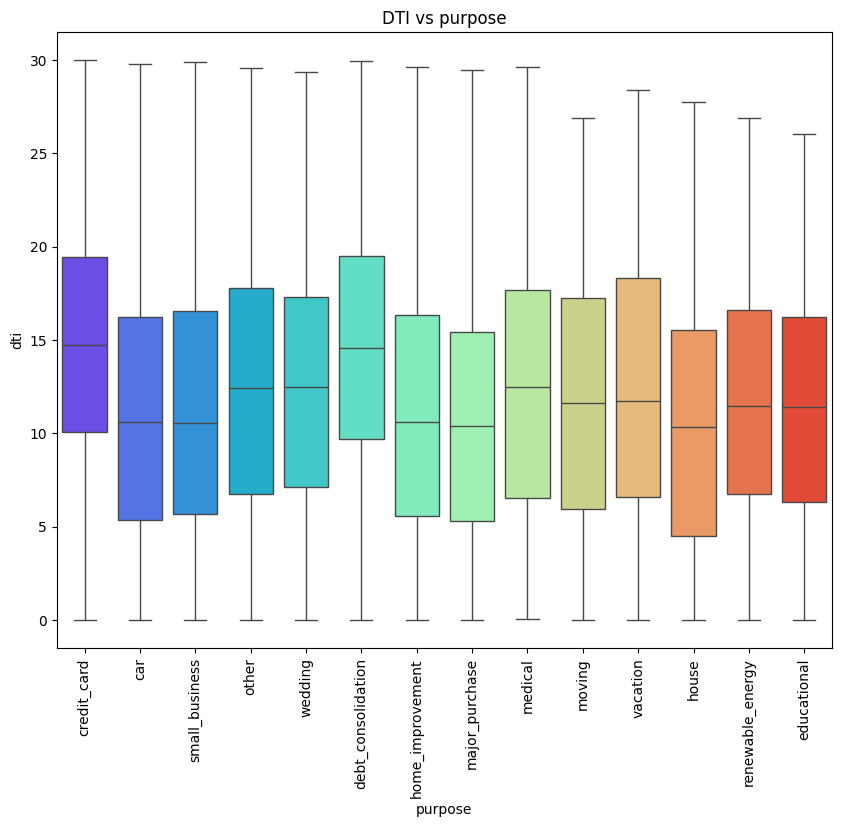

In [66]:
# dti vs purpose
plt.figure(figsize=(10,8))
# dti vs purpose
sns.boxplot(y=loan['dti'],x=loan['purpose'], palette='rainbow')
plt.xticks(rotation=90)
plt.title('DTI vs purpose')
plt.show()

Credit card and debt consolidation have the higher DTI ratio

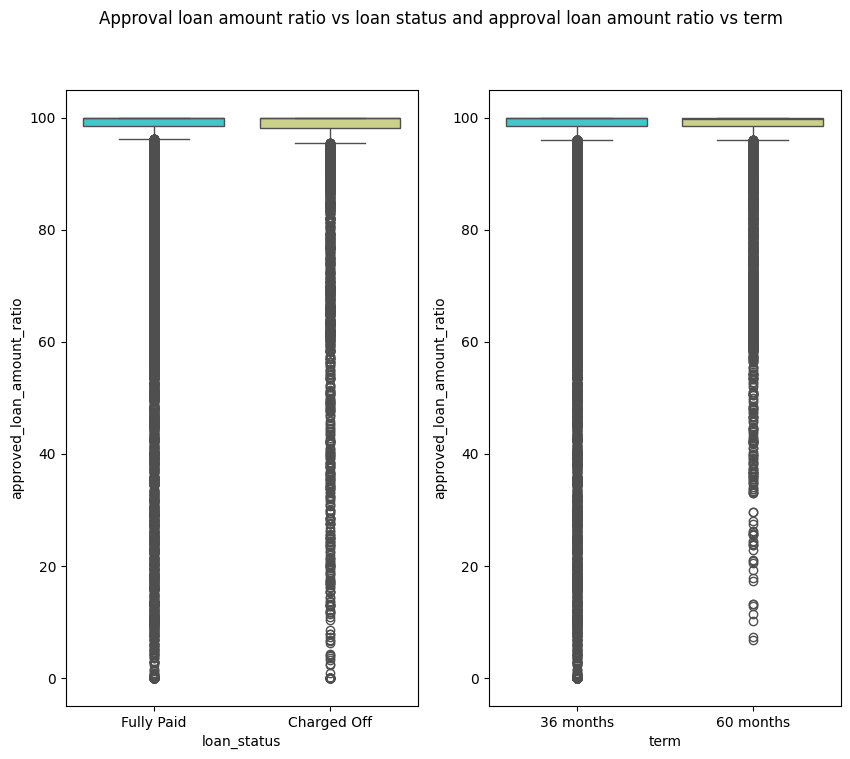

In [67]:
# approval loan amount ratio vs loan status and approval loan amount ratio vs term
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# approval loan amount ratio vs loan status
sns.boxplot(y=loan['approved_loan_amount_ratio'],x=loan['loan_status'], palette='rainbow')
plt.subplot(1,2,2)
# approval loan amount ratio vs term
sns.boxplot(y=loan['approved_loan_amount_ratio'],x=loan['term'], palette='rainbow')
plt.suptitle('Approval loan amount ratio vs loan status and approval loan amount ratio vs term')
plt.show()

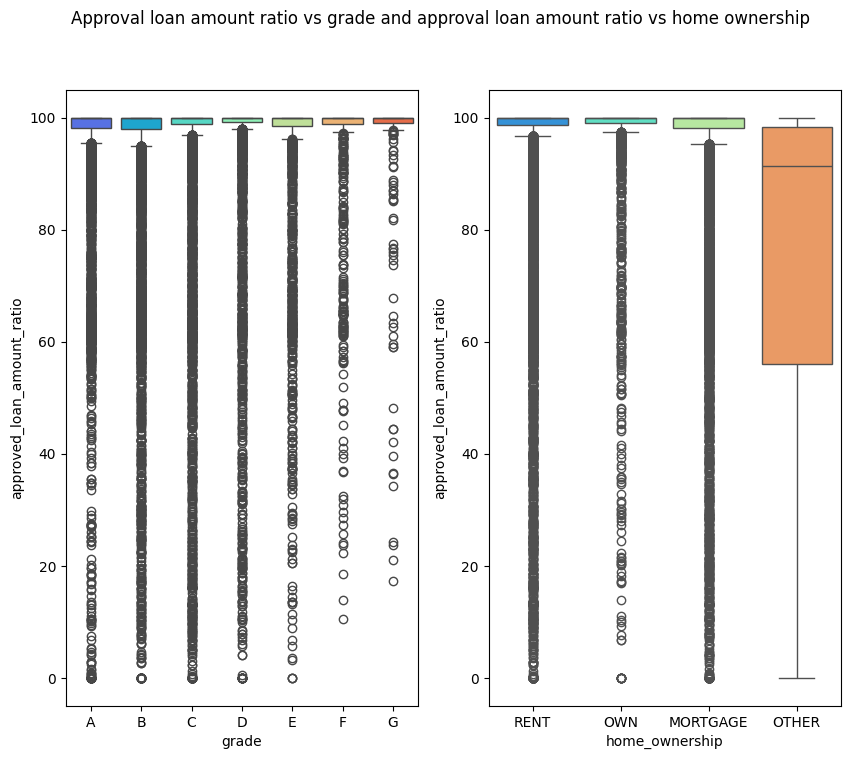

In [68]:
# approval loan amount ratio vs grade and approval loan amount ratio vs home ownership
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
# approval loan amount ratio vs grade
sns.boxplot(y=loan['approved_loan_amount_ratio'],x=loan['grade'], palette='rainbow',order=['A','B','C','D','E','F','G'])
plt.subplot(1,2,2)
# approval loan amount ratio vs home ownership
sns.boxplot(y=loan['approved_loan_amount_ratio'],x=loan['home_ownership'], palette='rainbow')
plt.suptitle('Approval loan amount ratio vs grade and approval loan amount ratio vs home ownership')
plt.show()

 1. Approved loan amount ration is higher for OTHER home ownership type

# Bivariate analysis

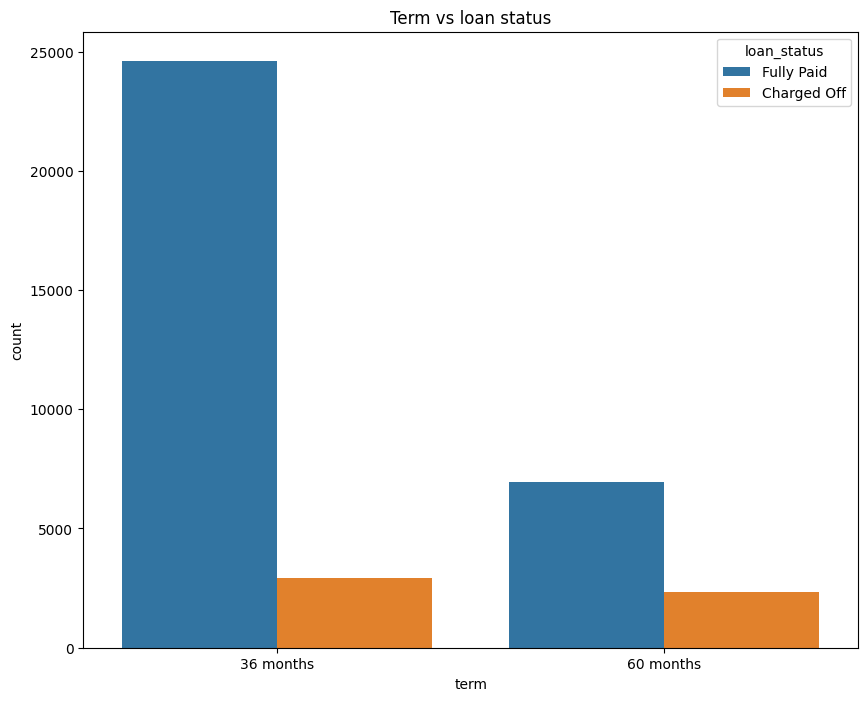

In [69]:
# Term vs loan status
plt.figure(figsize=(10,8))
sns.countplot(x=loan['term'],hue=loan['loan_status'])
plt.title('Term vs loan status')
plt.show()

1. There are more loan defaults in 60 months term than 36 months term
2. There are more fully paid loans in 36 months term than 60 months term

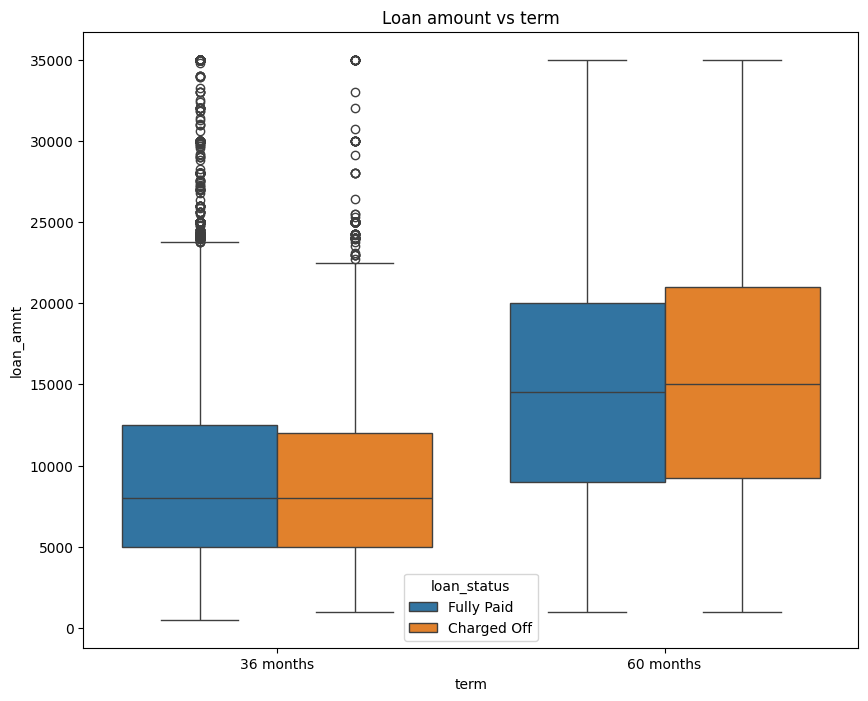

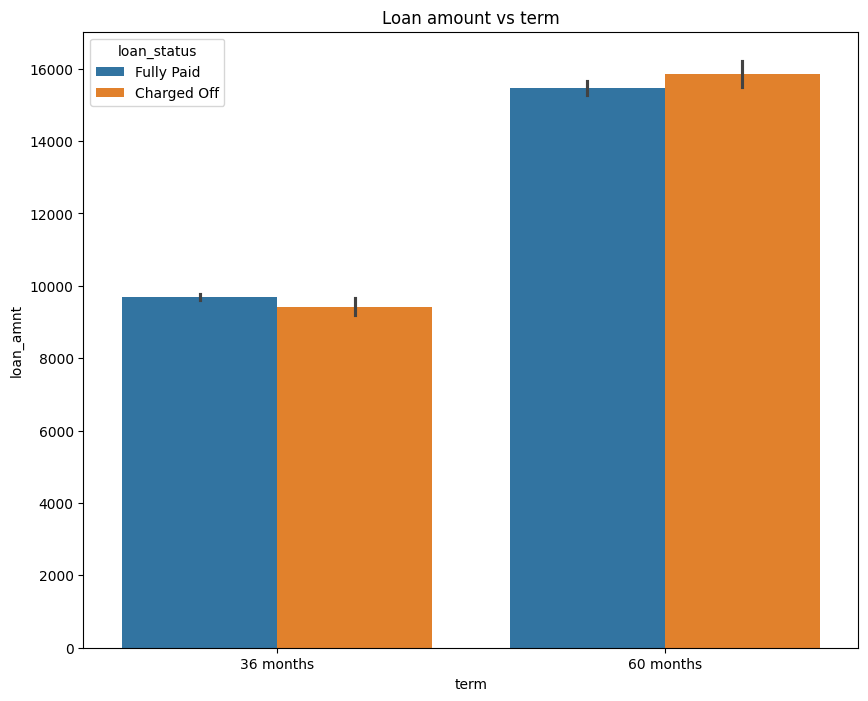

In [71]:
# loan amount vs term
# boxplot of loan amount vs term
plt.figure(figsize=(10,8))
sns.boxplot(y=loan['loan_amnt'],x=loan['term'], hue=loan['loan_status'])
plt.title('Loan amount vs term')
plt.show()
# barplot of loan amount vs term
plt.figure(figsize=(10,8))
sns.barplot(y=loan['loan_amnt'],x=loan['term'], hue=loan['loan_status'])
plt.title('Loan amount vs term')
plt.show()

loan amount is higher for 60 months term than 36 months term


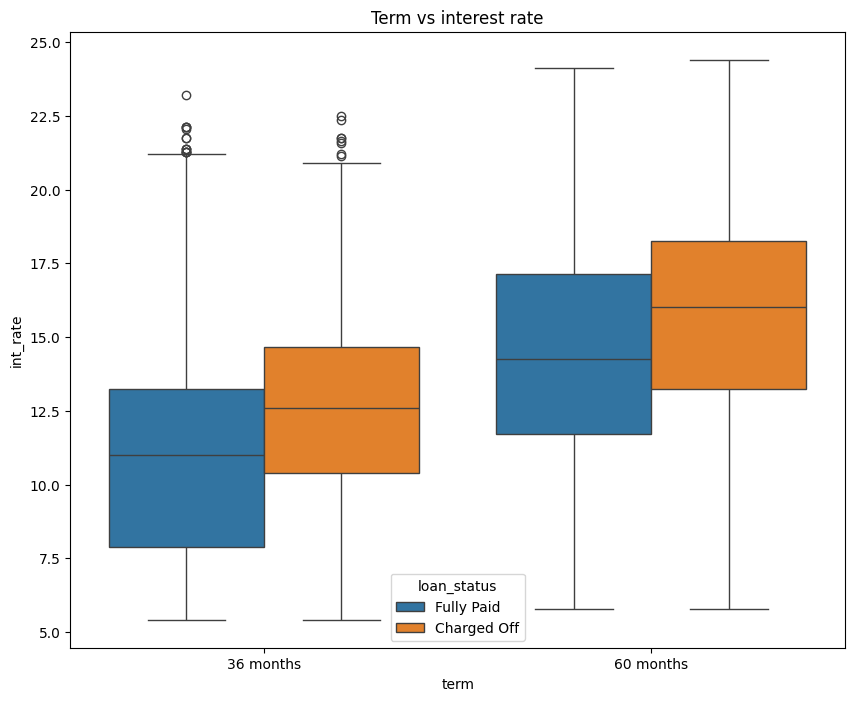

In [73]:
# term vs interest rate
# boxplot of term vs interest rate
plt.figure(figsize=(10,8))
sns.boxplot(y=loan['int_rate'],x=loan['term'], hue=loan['loan_status'])
plt.title('Term vs interest rate')
plt.show()


Higher interest rates have higher default rates in both 36 months and 60 months term loans

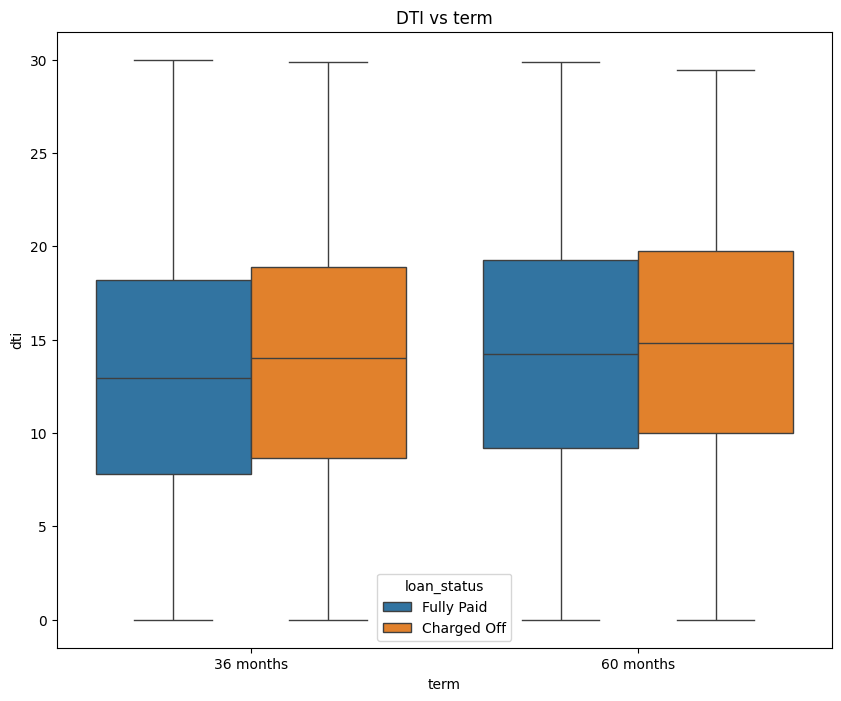

In [74]:
# dti vs term
# boxplot of dti vs term
plt.figure(figsize=(10,8))
sns.boxplot(y=loan['dti'],x=loan['term'], hue=loan['loan_status'])
plt.title('DTI vs term')
plt.show()

dti is higher for default loans

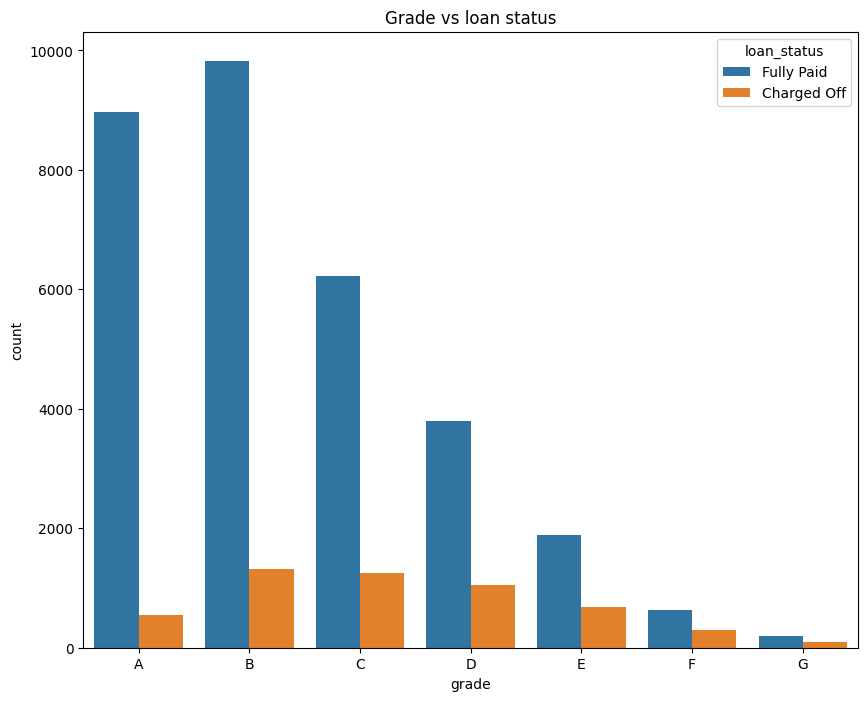

In [77]:
# grade vs loan status
plt.figure(figsize=(10,8))
sns.countplot(x=loan['grade'],hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs loan status')
plt.show()

default rate increased with the grade of the loan

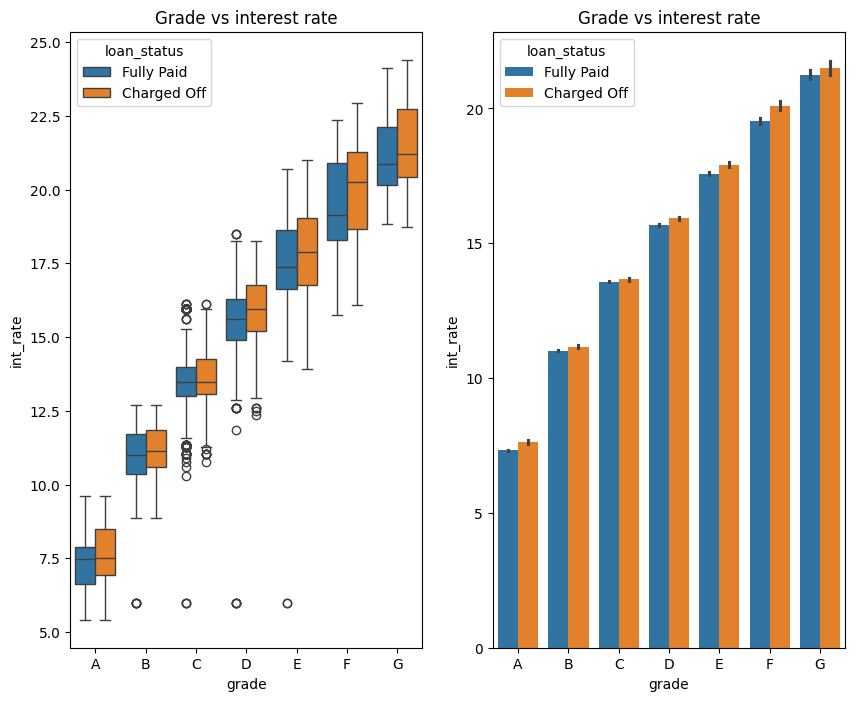

In [78]:
# grade vs interest rate
# boxplot of grade vs interest rate
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['int_rate'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs interest rate')
plt.subplot(1,2,2)
# barplot of grade vs interest rate
sns.barplot(y=loan['int_rate'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs interest rate')
plt.show()

Lower the grade, higher the interest rate

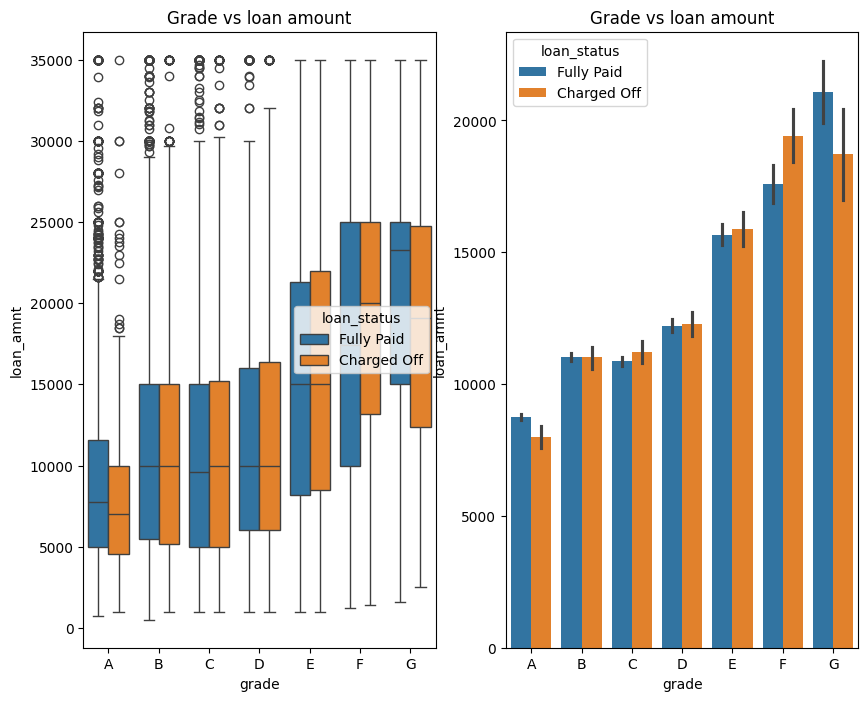

In [79]:
# grade vs loan amount
# boxplot of grade vs loan amount
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['loan_amnt'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs loan amount')
plt.subplot(1,2,2)
# barplot of grade vs loan amount
sns.barplot(y=loan['loan_amnt'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs loan amount')
plt.show()

loan amount is higher for lower grades like E,F,G

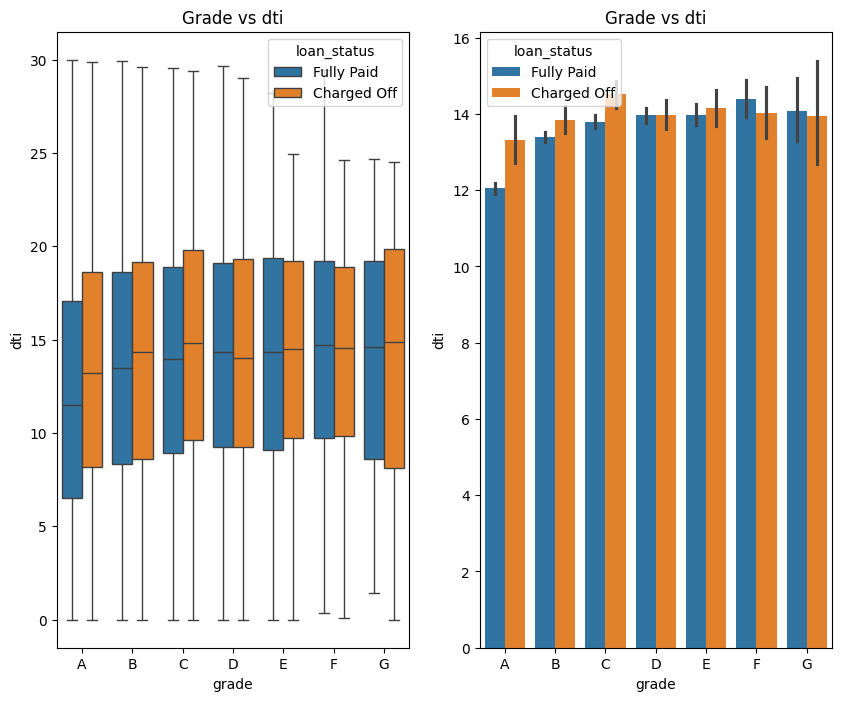

In [80]:
# grade vs dti
# boxplot of grade vs dti
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=loan['dti'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs dti')
plt.subplot(1,2,2)
# barplot of grade vs dti
sns.barplot(y=loan['dti'],x=loan['grade'], hue=loan['loan_status'],order=['A','B','C','D','E','F','G'])
plt.title('Grade vs dti')
plt.show()

no much change in the distribution of dti with respect to grade

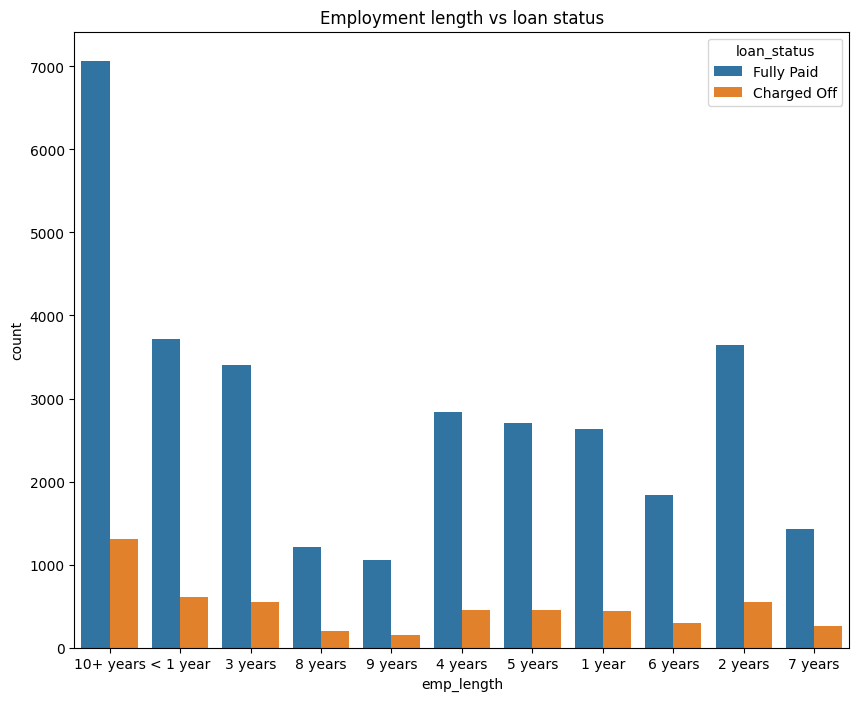

In [81]:
# employmnet length vs loan status 
plt.figure(figsize=(10,8))
sns.countplot(x=loan['emp_length'],hue=loan['loan_status'])
plt.title('Employment length vs loan status')
plt.show()

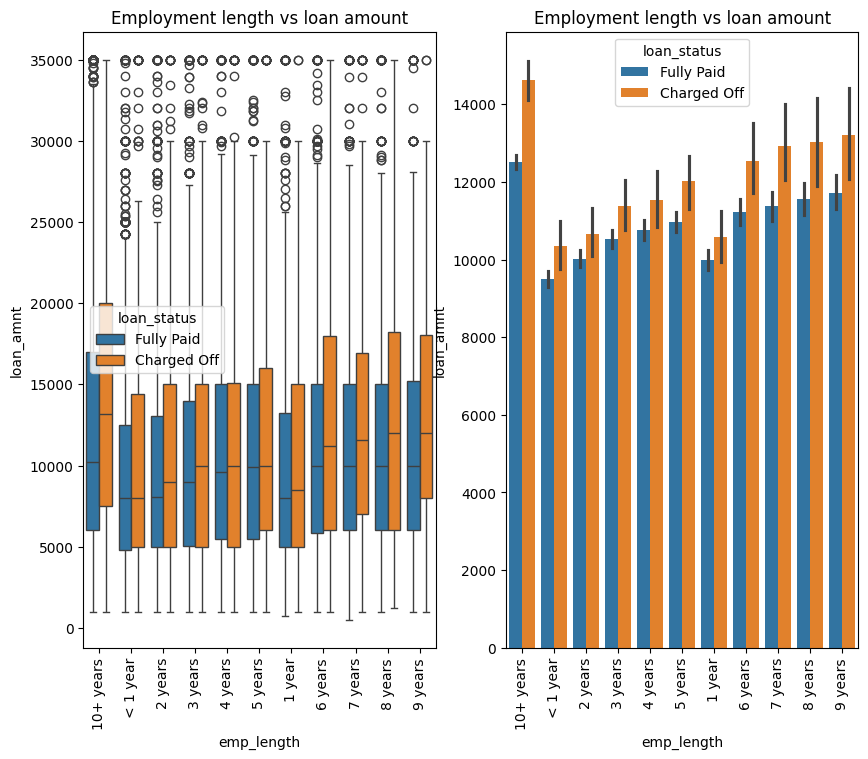

In [83]:
# employment length vs loan amount
# boxplot of employment length vs loan amount
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['emp_length'].value_counts().index
sns.boxplot(y=loan['loan_amnt'],x=loan['emp_length'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Employment length vs loan amount')
plt.subplot(1,2,2)
# barplot of employment length vs loan amount
sns.barplot(y=loan['loan_amnt'],x=loan['emp_length'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Employment length vs loan amount')
plt.show()


1. employees with higher experience are disbursed higher loan amounts
2. employees with higher experience also have higher default rates

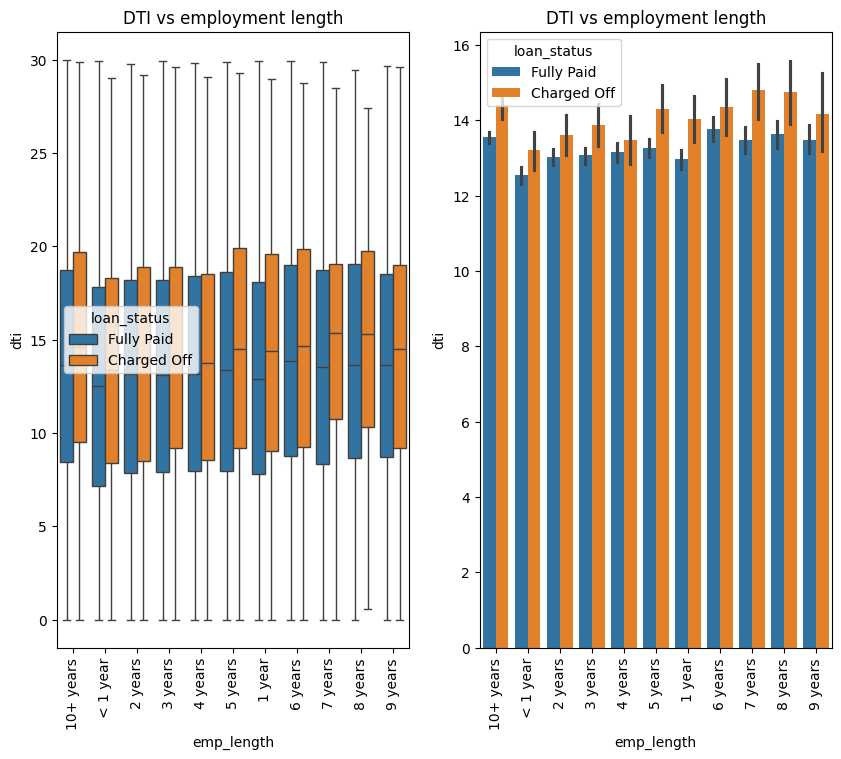

In [84]:
# DTI vs employment length
# boxplot of DTI vs employment length
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['emp_length'].value_counts().index
sns.boxplot(y=loan['dti'],x=loan['emp_length'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('DTI vs employment length')
plt.subplot(1,2,2)
# barplot of DTI vs employment length
sns.barplot(y=loan['dti'],x=loan['emp_length'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('DTI vs employment length')
plt.show()

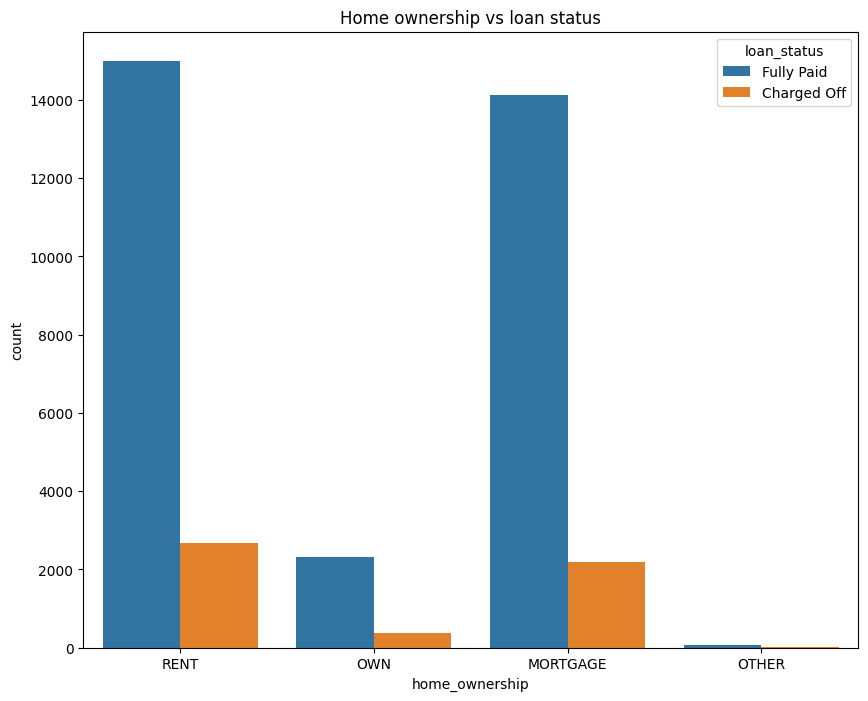

In [85]:
# home ownership vs loan status
plt.figure(figsize=(10,8))
sns.countplot(x=loan['home_ownership'],hue=loan['loan_status'])
plt.title('Home ownership vs loan status')
plt.show()

Higher default rate for people who have rented the house

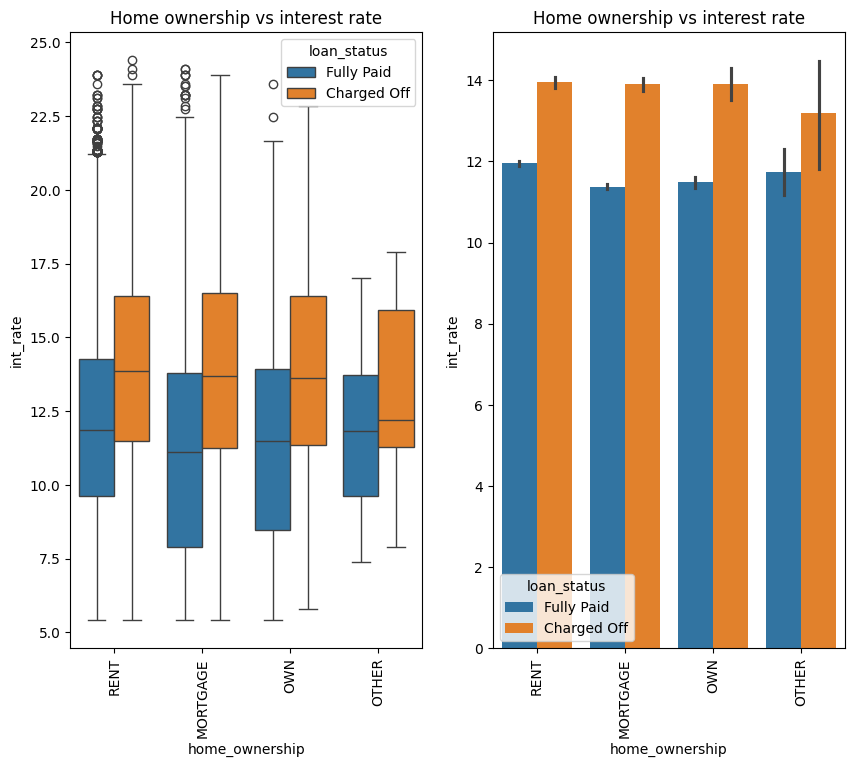

In [86]:
# home ownership vs interest rate
# boxplot of home ownership vs interest rate
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['home_ownership'].value_counts().index
sns.boxplot(y=loan['int_rate'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs interest rate')
plt.subplot(1,2,2)
# barplot of home ownership vs interest rate
sns.barplot(y=loan['int_rate'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs interest rate')
plt.show()

Higher the interest rate, higher the risk of default

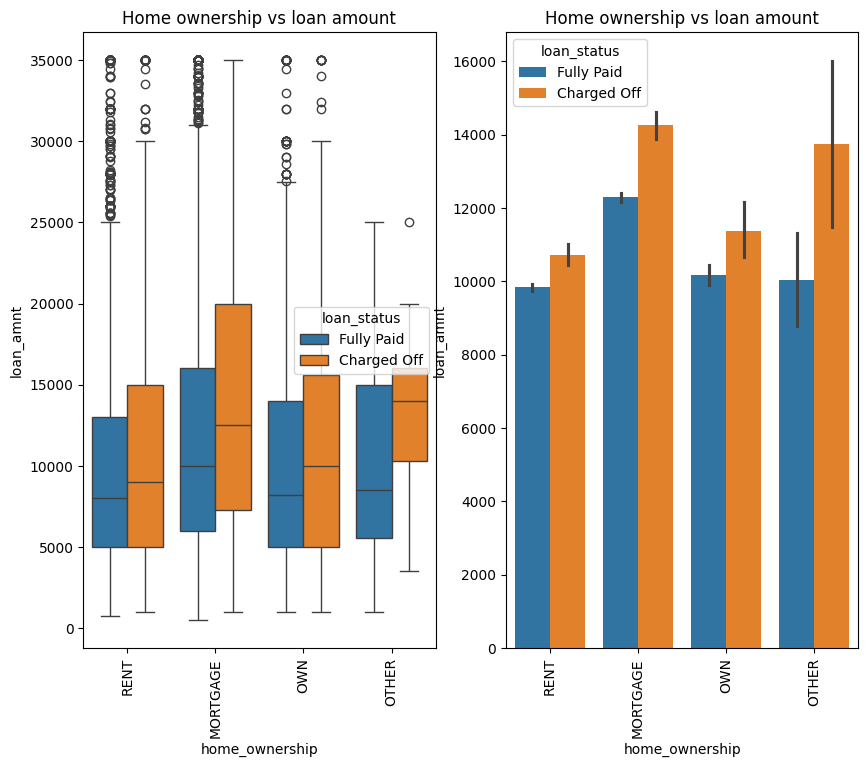

In [88]:
# home_ownership vs loan amount
# boxplot of home ownership vs loan amount
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['home_ownership'].value_counts().index
sns.boxplot(y=loan['loan_amnt'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs loan amount')
plt.subplot(1,2,2)
# barplot of home ownership vs loan amount
sns.barplot(y=loan['loan_amnt'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs loan amount')
plt.show()

Mortgage has the highest loan amount and highest default rate

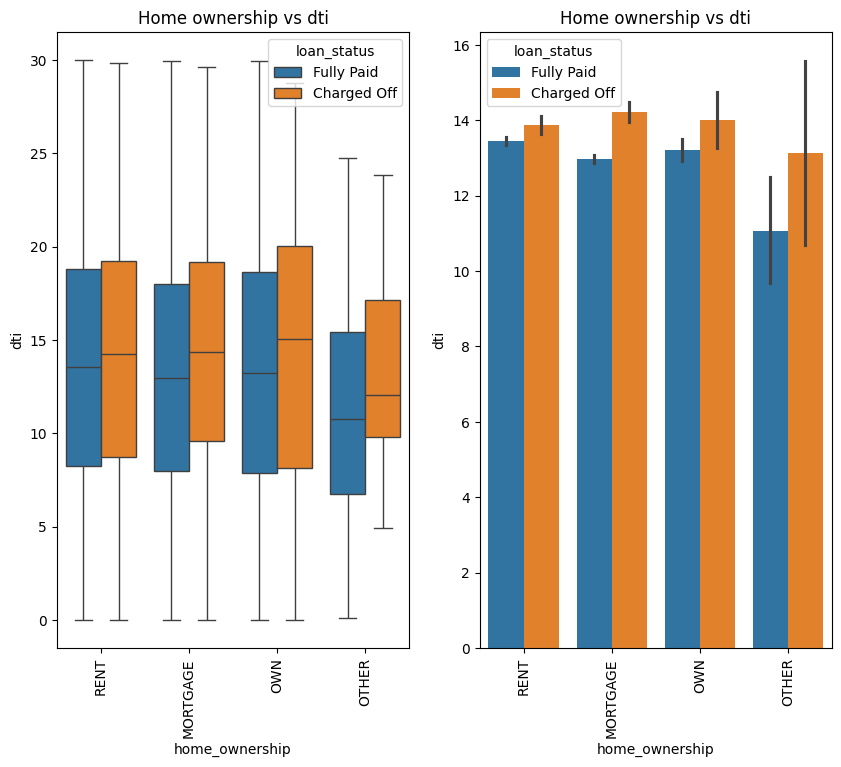

In [89]:
# home ownership vs dti
# boxplot of home ownership vs dti
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['home_ownership'].value_counts().index
sns.boxplot(y=loan['dti'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs dti')
plt.subplot(1,2,2)
# barplot of home ownership vs dti
sns.barplot(y=loan['dti'],x=loan['home_ownership'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Home ownership vs dti')
plt.show()

Other home ownership has lower DTI

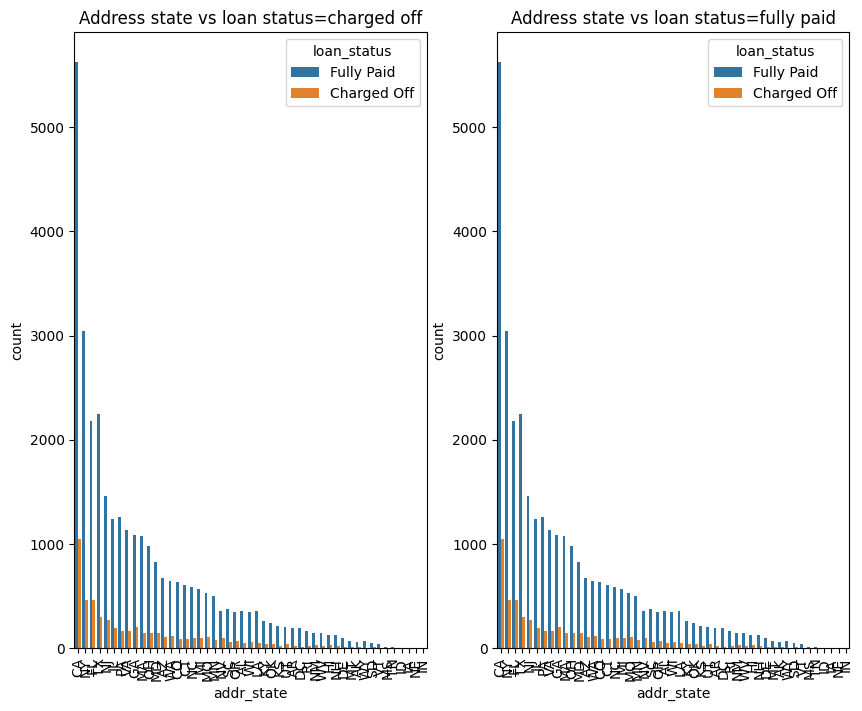

In [91]:
# address state vs loan status=charged off  and address state vs loan status=fully paid
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['addr_state'].value_counts().index
sns.countplot(x=loan['addr_state'],hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Address state vs loan status=charged off')
plt.subplot(1,2,2)
# address state vs loan status=fully paid
sns.countplot(x=loan['addr_state'],hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Address state vs loan status=fully paid')
plt.show()

1. More defaults in the states of CA, FL, NY, TX
2. More fully paid in the states of CA, FL, NY, TX

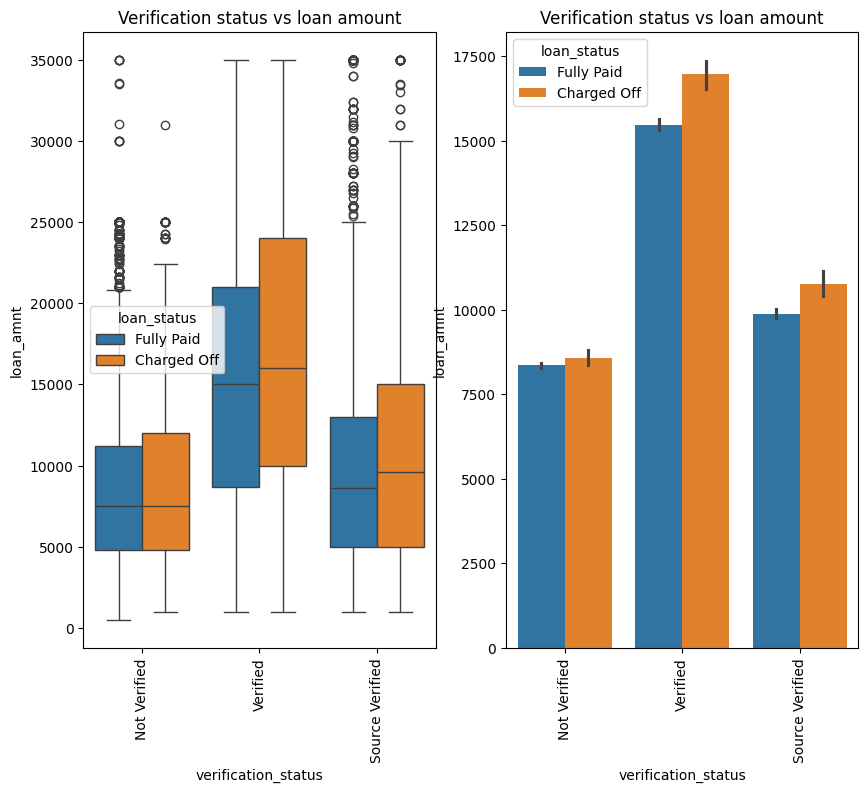

In [96]:
# verification status vs loan amount
# boxplot of verification status vs loan amount
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['verification_status'].value_counts().index
sns.boxplot(y=loan['loan_amnt'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs loan amount')
plt.subplot(1,2,2)
# barplot of verification status vs loan amount
sns.barplot(y=loan['loan_amnt'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs loan amount')
plt.show()


1. verified loans have higher loan amount than not verified loans
2. More defaulters in verified loans than not verified loans

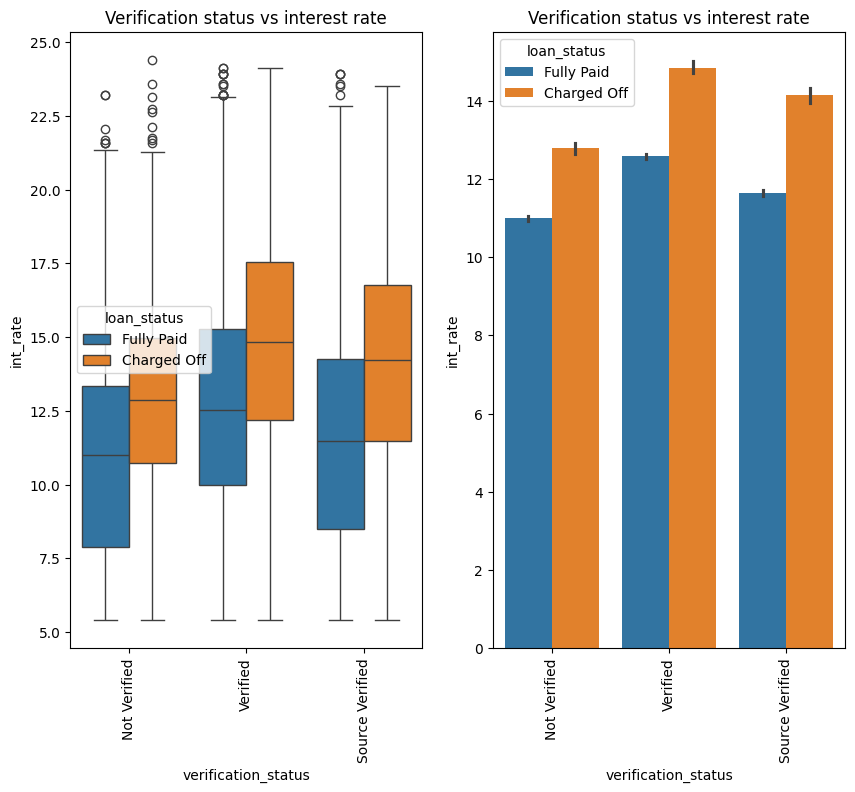

In [97]:
# verification status vs interest rate
# boxplot of verification status vs interest rate
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['verification_status'].value_counts().index
sns.boxplot(y=loan['int_rate'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs interest rate')
plt.subplot(1,2,2)
# barplot of verification status vs interest rate
sns.barplot(y=loan['int_rate'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs interest rate')
plt.show()

1. Higher interest rates have higher default rates

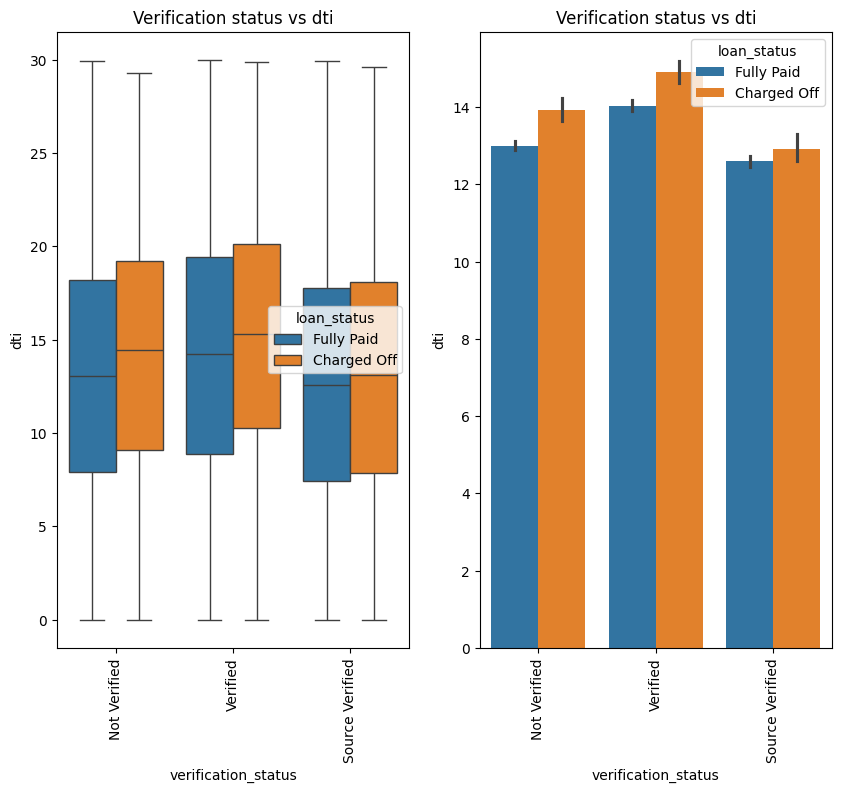

In [98]:
# verification status vs dti
# boxplot of verification status vs dti
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['verification_status'].value_counts().index
sns.boxplot(y=loan['dti'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs dti')
plt.subplot(1,2,2)
# barplot of verification status vs dti
sns.barplot(y=loan['dti'],x=loan['verification_status'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Verification status vs dti')
plt.show()

Defaulters have high DTI and interest rate

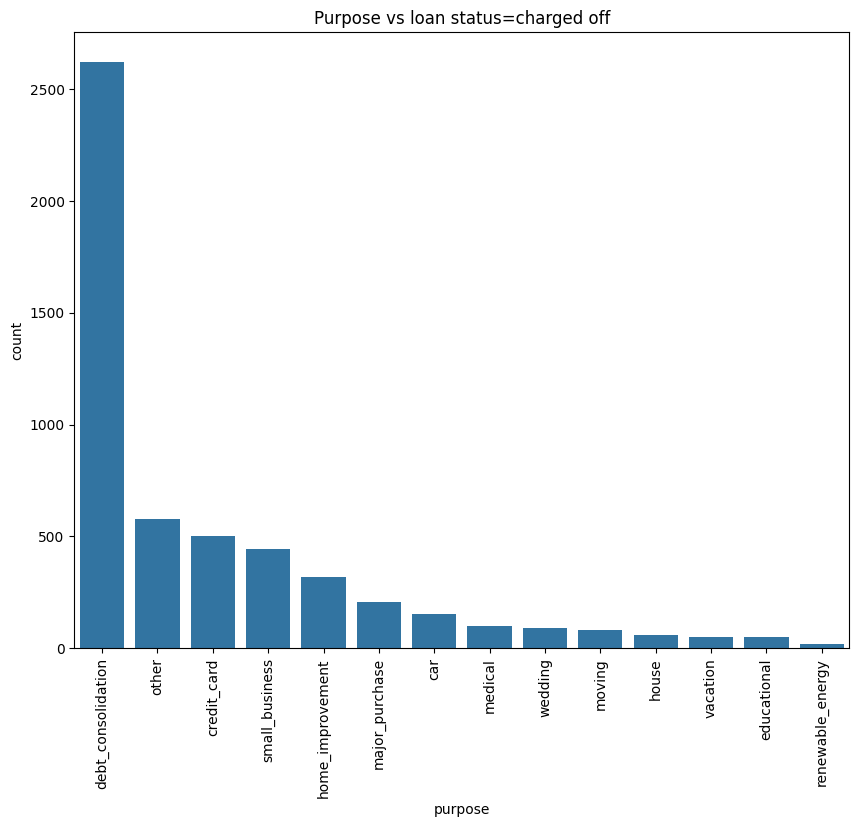

In [100]:
# purpose vs loan status=charged off
# only select charged off loan status
loan_charged_off=loan[loan['loan_status']=='Charged Off']
plt.figure(figsize=(10,8))
order = loan_charged_off['purpose'].value_counts().index
sns.countplot(x=loan_charged_off['purpose'],order=order)
plt.xticks(rotation=90)
plt.title('Purpose vs loan status=charged off')
plt.show()


More defaulters are from debt consolidation, credit card and other purposes

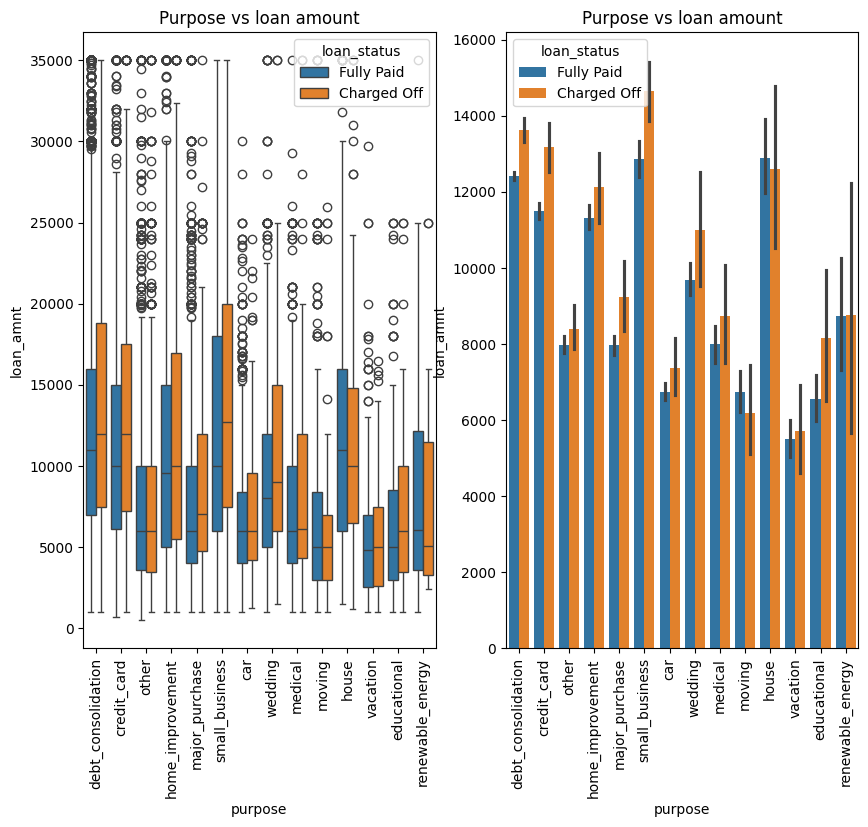

In [102]:
# purpose vs loan amount
# boxplot of purpose vs loan amount
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['purpose'].value_counts().index
sns.boxplot(y=loan['loan_amnt'],x=loan['purpose'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Purpose vs loan amount')
plt.subplot(1,2,2)
# barplot of purpose vs loan amount
sns.barplot(y=loan['loan_amnt'],x=loan['purpose'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Purpose vs loan amount')
plt.show()

small business has the highest number of charged off loans and highest loan amount

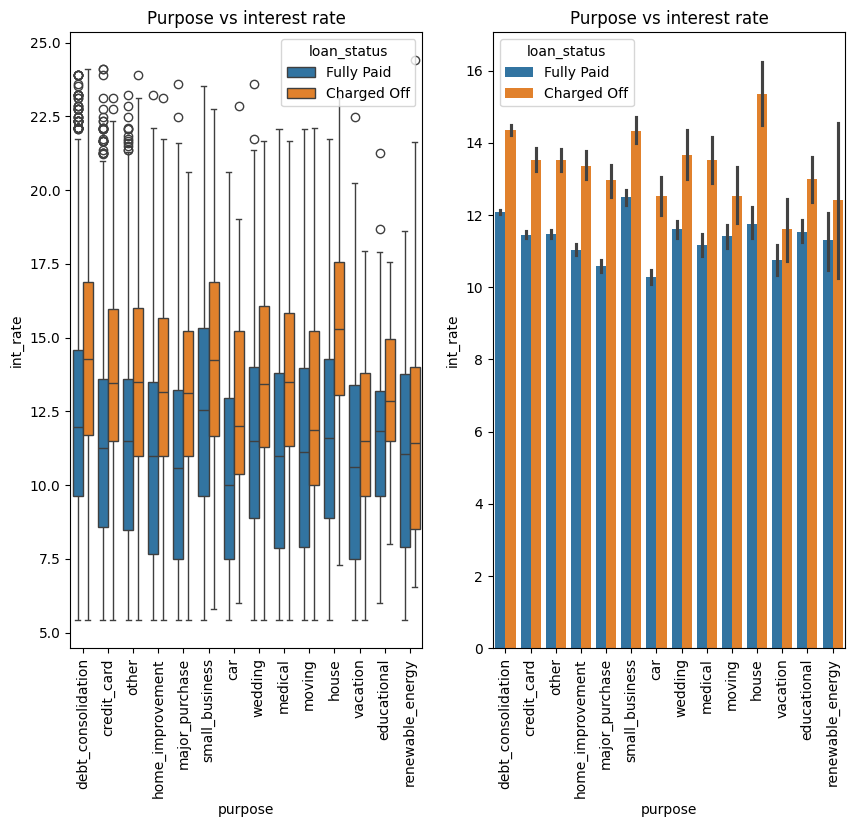

In [103]:
# purpose vs interest rate
# boxplot of purpose vs interest rate
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
order = loan['purpose'].value_counts().index
sns.boxplot(y=loan['int_rate'],x=loan['purpose'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Purpose vs interest rate')
plt.subplot(1,2,2)
# barplot of purpose vs interest rate
sns.barplot(y=loan['int_rate'],x=loan['purpose'], hue=loan['loan_status'],order=order)
plt.xticks(rotation=90)
plt.title('Purpose vs interest rate')
plt.show()

1. Loans with high interest rates are more likely to be defaulted
2. House loans, small business loans and debt consolidation loans are more likely to be defaulted


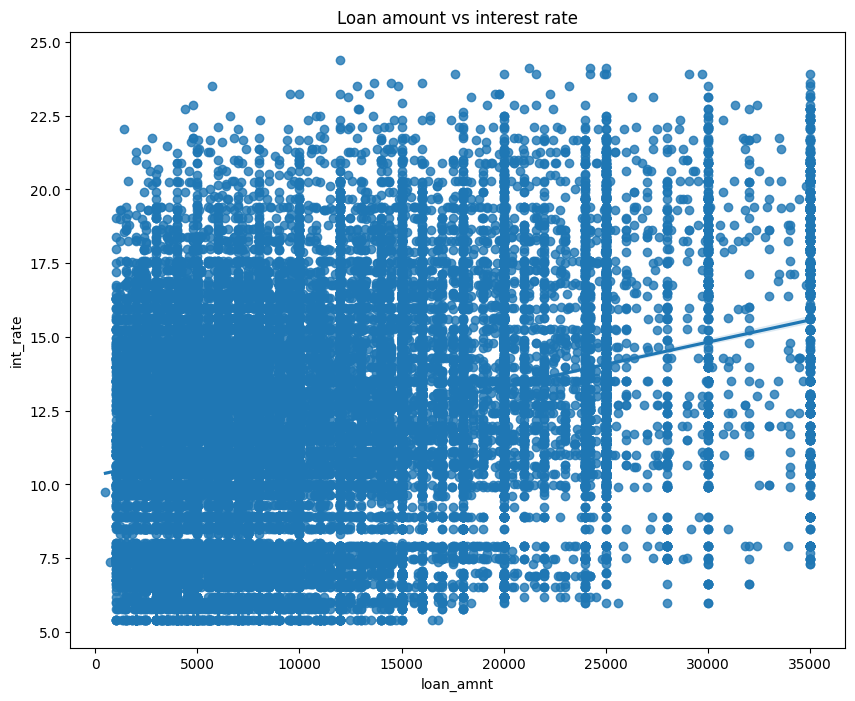

In [105]:
# loan amount vs interest rate
# scatter plot of loan amount vs interest rate
plt.figure(figsize=(10,8))
sns.regplot(x=loan['loan_amnt'],y=loan['int_rate'])
plt.title('Loan amount vs interest rate')
plt.show()

# Inference from the above plot
As the loan amount increases, the interest rate also increases. This is because the risk of default increases with the loan amount


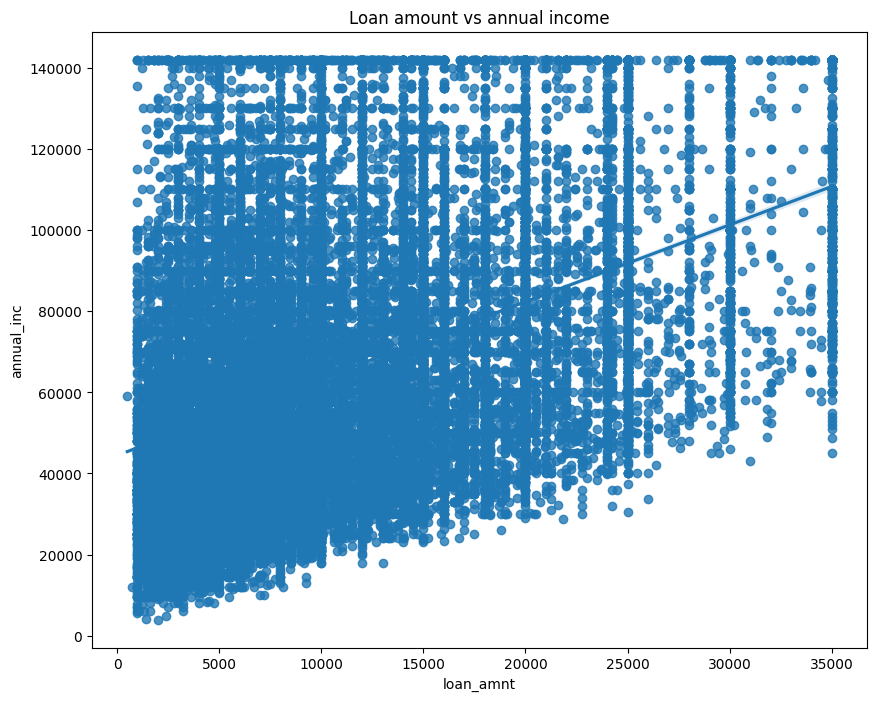

In [107]:
# loan amount vs annual income
# scatter plot of loan amount vs annual income aginst loan status=charged off
plt.figure(figsize=(10,8))
sns.regplot(x=loan['loan_amnt'],y=loan['annual_inc'])
plt.title('Loan amount vs annual income')
plt.show()

# Inference from the above plot
1. The loan amount increases with increase in annual income

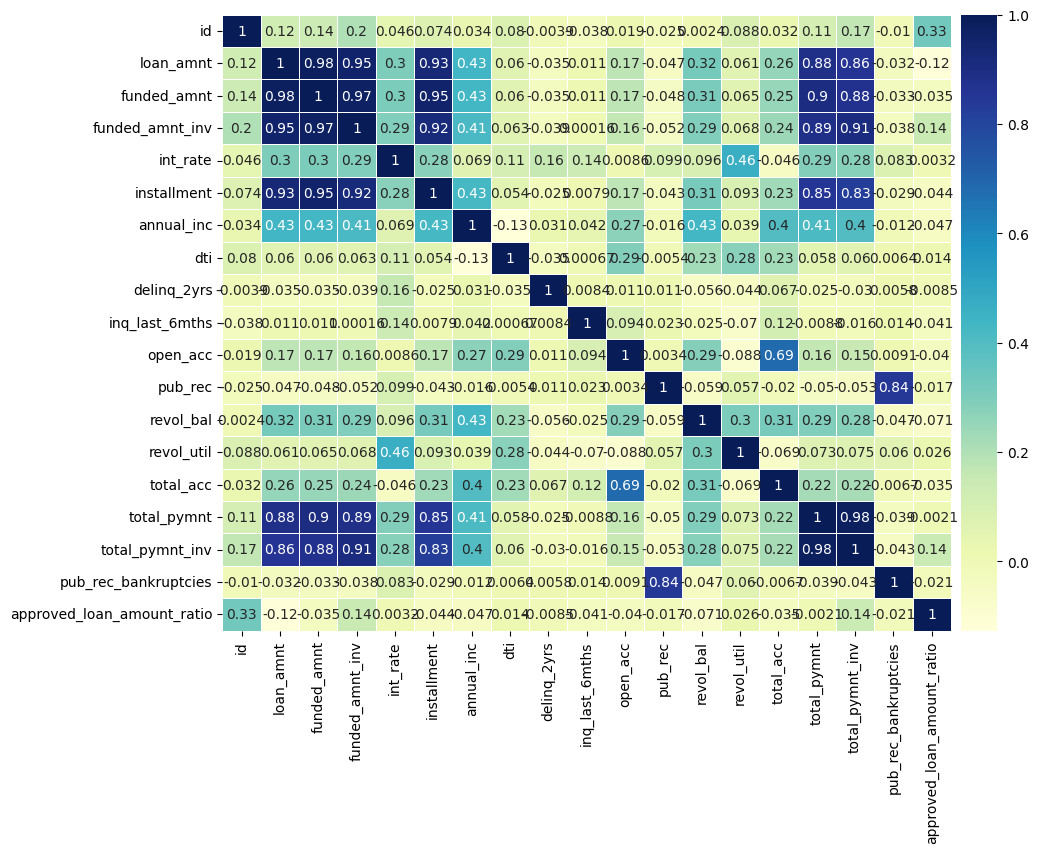

In [118]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sns.heatmap(loan_corr, annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar_ax=cax)
plt.xticks(rotation=90)
plt.show()

# Inference from the above correlation matrix, highly correlated variables are
1. Loan amount and funded amount are highly correlated
2. Loan amount and installment are highly correlated
3. Funded amount and installment are highly correlated
4. Interest rate and grade are highly correlated
5. Loan amount and approved loan amount ratio are highly correlated

# Moderate correlation
1. Loan amount and int_rate are moderately correlated
2. Loan amount and dti are moderately correlated
3. Funded amount and int_rate are moderately correlated
4. Funded amount and dti are moderately correlated
5. Int_rate and dti are moderately correlated

# Low correlation
1. Loan amount and annual income are low correlated
2. Funded amount and annual income are low correlated
3. Int_rate and annual income are low correlated
4. Dti and annual income are low correlated
5. Approved loan amount ratio and annual income are low correlated

